<h1 style="font-size: 50px;"><strong>Global Electric Vehicles Data Analysis</strong></h1>


<div style="text-align: left;">
    <h3><strong>Co-authors:</strong></h3>
</div>

<div style="display: flex; justify-content: center; align-items: center;">
    <div style="text-align: center; margin-right: 5px;">
        <img src="pics/RAVI.png" alt="Ravi Image" width="130" height="170"/><br>
        <strong>Ravi Harun</strong><br>
        UC San Diego '25<br>
        <i>Mechanical Engineering Major; Data Science Minor</i>
    </div>
    <div style="text-align: center; margin-left: 5px;">
        <img src="pics/VARICK.png" alt="Varick Image" width="130" height="170"/><br>
        <strong>Varick Hasim</strong><br>
        UC San Diego '27<br>
        <i>Data Science Major; Technology, Innovation, & Supply Chain Minor</i>
    </div>
</div>



This project aims to analyze, among others, **EV sales trend, sustainability, and their relation globally** using historical data compiled  by **the International Energy Agency** up to **2023.** 

In this project we have utilized a Global EV Dataset from Kaggle:
- [Kaggle Dataset](https://www.kaggle.com/datasets/padmapiyush/global-electric-vehicle-dataset-2023/data)

### Outcomes

1. [Ranking Continents and Countries Based on EV Sales](#outcome-1-ranking-continents-and-countries-based-on-ev-sales--back-to-outcomes)
2. [Year-by-Year Visualization of EV Sales and Stock Per Continent and Top 10 Globally with An In-depth Analysis on The European EV Market](#outcome-2-year-by-year-visualization-of-ev-sales-and-stock-per-continent-and-top-10-globally-with-an-in-depth-analysis-on-the-european-ev-market)
3. [EV Powertrains Sales and Stocks of Top EV Countries](#outcome-3-ev-powertrains-sales-and-stocks-of-top-ev-countries)
4. [Electricity Demand by Mode and the Relationship Between EV Charging Points and EVs Sold](#outcome-4-electricity-demand-by-mode-and-the-relationship-between-ev-charging-points-and-evs-sold)
5. [Year-by-Year Visualization of National EV Stock and Sales **Shares** By Mode of the Top 5 Countries for EVs Sold](#outcome-5-year-by-year-visualization-of-national-ev-stock-and-sales-shares-by-mode-of-the-top-5-countries-for-evs-sold)

### Table of Contents

1. **Part 1:** [Installing & Importing Necessary Python Libraries](#part-1-installing--importing-necessary-python-libraries)
2. **Part 2:** [Reading & Exploring Data](#part-2-reading--exploring-data)
3. **Part 3:** [Data Analysis + Visualization](#part-3-data-analysis--visualization)
4. **Part 4:** [Final Results + Conclusion](#part-4-final-results--conclusion)

## **Part 1:** Installing & Importing Necessary Python Libraries ##

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import  warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

## **Part 2:** Reading & Exploring Data ##
[Back to Table of Contents](#table-of-contents)

In [113]:
df = pd.read_csv('Global EV 2023.csv')
df.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00046
3,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,170.00000


Before exploration, it was important to check if the dataset had any null values. If any existed, it would need to be removed. Fortunately, this dataset had 0 null values.

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9542 entries, 0 to 9541
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      9542 non-null   object 
 1   category    9542 non-null   object 
 2   parameter   9542 non-null   object 
 3   mode        9542 non-null   object 
 4   powertrain  9542 non-null   object 
 5   year        9542 non-null   int64  
 6   unit        9542 non-null   object 
 7   value       9542 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 596.5+ KB


In [115]:
df.columns

Index(['region', 'category', 'parameter', 'mode', 'powertrain', 'year', 'unit',
       'value'],
      dtype='object')

Below, the dataset is manipulated so that only unique countries are kept. **Europe** and **EU27** are data for regions, not unique countries. Hence, it will be removed from the dataset.

In [116]:
df = df[(df['region'] != 'Europe') & (df['region'] != 'EU27')]
df.get('region').unique()

array(['Australia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'Chile',
       'China', 'Denmark', 'Finland', 'France', 'Germany', 'Greece',
       'Iceland', 'India', 'Indonesia', 'Israel', 'Italy', 'Japan',
       'Korea', 'Mexico', 'Netherlands', 'New Zealand', 'Norway',
       'Other Europe', 'Poland', 'Portugal', 'Rest of the world',
       'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Thailand',
       'Turkiye', 'United Kingdom', 'USA', 'World'], dtype=object)

Listing the parameters measured by the data below are helpful in guiding the direction of the analysis by showing us factors we can pivot our analyses on.

In [117]:
df.get('parameter').unique()

array(['EV stock', 'EV sales share', 'EV stock share', 'EV sales',
       'EV charging points', 'Electricity demand', 'Oil displacement Mbd',
       'Oil displacement, million lge'], dtype=object)

### **Part 2.1:** General Data Cleaning and Preprocessing ###

Some outcomes will have conclusions based on continents, instead of individual countries. Hence, the method below is helpful in processing our dataset to add a new *continent* column in our dataframe.

In [118]:
country_classification = {
    'Australia': 'Oceania',
    'Austria': 'Europe',
    'Belgium': 'Europe',
    'Brazil': 'South America',
    'Canada': 'North America',
    'Chile': 'South America',
    'China': 'Asia',
    'Denmark': 'Europe',
    'Finland': 'Europe',
    'France': 'Europe',
    'Germany': 'Europe',
    'Greece': 'Europe',
    'Iceland': 'Europe',
    'India': 'Asia',
    'Indonesia': 'Asia',
    'Israel': 'Asia',
    'Italy': 'Europe',
    'Japan': 'Asia',
    'Korea': 'Asia',
    'Mexico': 'North America',
    'Netherlands': 'Europe',
    'New Zealand': 'Oceania',
    'Norway': 'Europe',
    'Other Europe': 'Europe',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Rest of the world': 'Unknown',
    'South Africa': 'Africa',
    'Spain': 'Europe',
    'Sweden': 'Europe',
    'Switzerland': 'Europe',
    'Thailand': 'Asia',
    'Turkiye': 'Asia',
    'United Kingdom': 'Europe',
    'USA': 'North America',
    'Rest of the world' : 'Rest of the world'
}

def classify_continent(country):
    return country_classification.get(country, 'Unknown')

df['continent'] = df['region'].apply(classify_continent)

df.head()

,region,category,parameter,mode,powertrain,year,unit,value,continent
0,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000,Oceania
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650,Oceania
2,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00046,Oceania
3,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000,Oceania
4,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,170.00000,Oceania


## **Part 3:** Data Analysis + Visualization ##
[Back to Table of Contents](#table-of-contents)

 #### **Outcome 1**: Ranking Continents and Countries Based on EV Sales | [Back to Outcomes](#aim--outcomes)


##### Outcome 1.1: Ranking continents with the most total global EV sales

To compare the EV sales across each continent, only **historical data** and **EV sales** data are needed. Additionally, **global data is not needed** as the scope of this analysis are individual continents. Hence, these are removed from the original dataset for this outcome.

In [119]:
outcome1_df = df[(df.get('category') == 'Historical') & (df.get('parameter') == 'EV sales') & (df.get('region') != 'World')]
outcome1_df.head()

,region,category,parameter,mode,powertrain,year,unit,value,continent
3,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.0,Oceania
4,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,170.0,Oceania
9,Australia,Historical,EV sales,Cars,PHEV,2012,Vehicles,80.0,Oceania
10,Australia,Historical,EV sales,Cars,PHEV,2013,Vehicles,100.0,Oceania
15,Australia,Historical,EV sales,Cars,BEV,2013,Vehicles,190.0,Oceania


In [120]:
continent_df = outcome1_df.groupby(by = 'continent').sum()
continent_df.sort_values(by='value', ascending=False).drop(columns= ['region', 'parameter', 'mode', 'powertrain', 'year', 'unit', 'category'])

,value
continent,
Asia,1.624346e+07
Europe,8.428000e+06
North America,3.793233e+06
Oceania,1.497750e+05
Rest of the world,8.097600e+04
South America,4.395100e+04
Africa,2.380000e+03


When data is grouped by continents, some unidentified countries are also grouped into **"Rest of the world"** data. Since analysis is focused on unique continents, these data are not needed for this outcome. Hence, it will also be removed.

In [121]:
continent_df = continent_df.drop('Rest of the world')

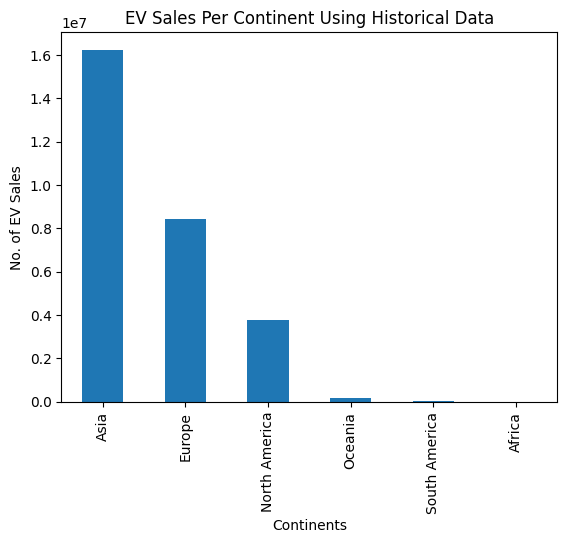

In [122]:
cont_sales = (continent_df.sort_values(by= 'value', ascending = False )
              .plot(kind = 'bar', y = 'value', legend = False,
                    title = 'EV Sales Per Continent Using Historical Data')
)
cont_sales.set_xlabel('Continents')
cont_sales.set_ylabel('No. of EV Sales');


**Analysis shows that the continents with the most EV sales from 2011-2022** (in descending order) **are:**
1. Asia (~16,243,460 units)
2. Europe (~8,428,000 units)
3. North America (~3,793,233 units)
4. Oceania (~149,775 units)
5. South America (~43,395 units)
6. Africa (~2,380 units)


##### Outcome 1.2: Top country(s) in each continent with the most total global EV sales | [Back to Outcome 1](#outcome-1-ranking-continents-and-countries-based-on-ev-sales--back-to-outcomes)

For this outcome, the top 5 countries of each continent will be outputted. However, if the amount of unique countries in each continent does not reach 5, the number will change.

To analyze each continent deeper, unique dataframes for each continent are made below.

In [123]:
africa_df = outcome1_df[(outcome1_df.get('category') == 'Historical') & (outcome1_df.get('parameter') == 'EV sales') & (outcome1_df.get('continent') == 'Africa')]
asia_df = outcome1_df[(outcome1_df.get('category') == 'Historical') & (outcome1_df.get('parameter') == 'EV sales') & (outcome1_df.get('continent') == 'Asia')]
europe_df = outcome1_df[(outcome1_df.get('category') == 'Historical') & (outcome1_df.get('parameter') == 'EV sales') & (outcome1_df.get('continent') == 'Europe')]
na_df = outcome1_df[(outcome1_df.get('category') == 'Historical') & (outcome1_df.get('parameter') == 'EV sales') & (outcome1_df.get('continent') == 'North America')]
oceania_df = outcome1_df[(outcome1_df.get('category') == 'Historical') & (outcome1_df.get('parameter') == 'EV sales') & (outcome1_df.get('continent') == 'Oceania')]
sa_df = outcome1_df[(outcome1_df.get('category') == 'Historical') & (outcome1_df.get('parameter') == 'EV sales') & (outcome1_df.get('continent') == 'South America')]

##### Outcome 1.2.1: Top country(s) in Africa with the most total global EV sales | [Back to Outcome 1](#outcome-1-ranking-continents-and-countries-based-on-ev-sales--back-to-outcomes)

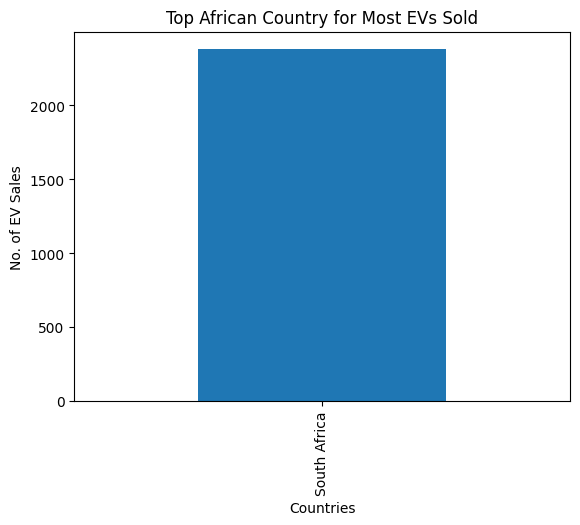

In [124]:
africa_top = africa_df.groupby(by = 'region').sum().drop(columns = ['continent','category','parameter','mode','powertrain','year','unit'])
africa_top = africa_top.sort_values(by='value', ascending=False)
africa_top = africa_top.plot(kind = 'bar', y = 'value', legend = False,
                                   title = 'Top African Country for Most EVs Sold'
                                   )

africa_top.set_ylabel('No. of EV Sales')
africa_top.set_xlabel('Countries');

From the chart above, South Africa sold the most EV units in Africa. However, it is important to note that **South Africa is the only unique African country in the dataset**. If other African countries were present in the dataset, this chart would definitely look different.

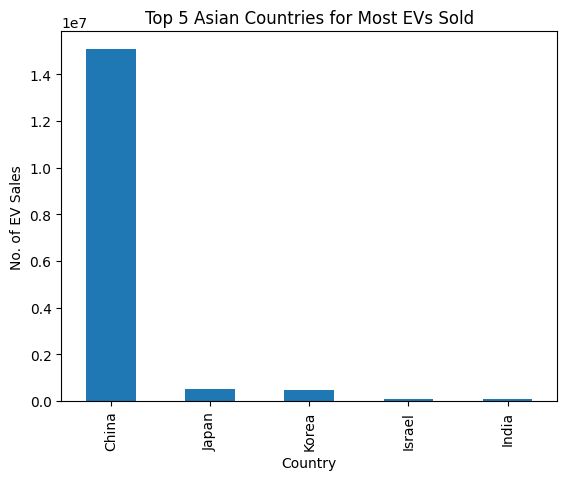

In [125]:
asia_top = asia_df.groupby(by = 'region').sum().drop(columns = ['continent','category','parameter','mode','powertrain','year','unit'])
asia_top = asia_top.sort_values(by='value', ascending=False)
asia_top3 = asia_top[0:5].plot(kind = 'bar', y = 'value', legend = False,
                                   title = 'Top 5 Asian Countries for Most EVs Sold'
                                   )

asia_top3.set_ylabel('No. of EV Sales')
asia_top3.set_xlabel('Country');

The chart above shows China dominating the Asian EV market, with Japan and Korea being second and third, respectively. As China is the biggest EV producer in the world, this conclusion makes sense. China has **some of the biggest EV brands** in the world, including BYD, Wuling, Chery, and also western automakers like Tesla and Volkswagen having a large presence in the country. 

Japan's biggest automotive brands: Toyota, Honda, Lexus, Nissan, and Mitsubishi's EV and hybrid models are **in close competition** with Korea's two biggest brands: Hyundai and Kia, with Japan narrowly winning so far. 

##### Outcome 1.2.2: Top country(s) in Europe with the most total global EV sales | [Back to Outcome 1](#outcome-1-ranking-continents-and-countries-based-on-ev-sales--back-to-outcomes)

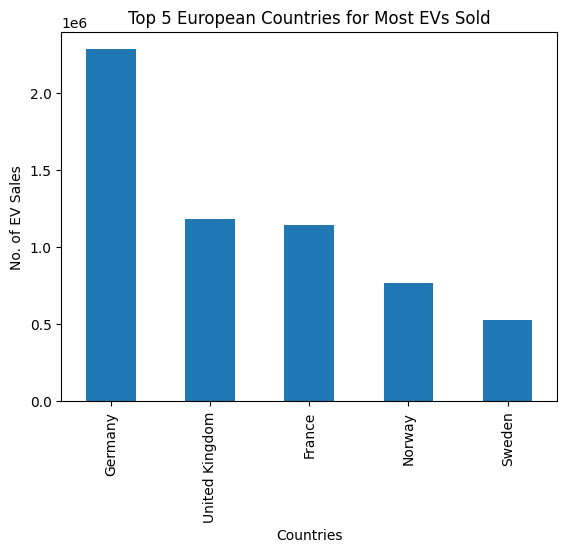

In [126]:
europe_top = europe_df.groupby(by = 'region').sum().drop(columns = ['continent','category','parameter','mode','powertrain','year','unit'])
europe_top = europe_top.sort_values(by='value', ascending=False)
europe_top3 = europe_top[0:5].plot(kind = 'bar', y = 'value', legend = False,
                                   title = 'Top 5 European Countries for Most EVs Sold'
                                   )

europe_top3.set_ylabel('No. of EV Sales')
europe_top3.set_xlabel('Countries');



The chart above shows Germany dominating the European EV market. As **Germany is the second biggest EV producer globally** only behind China, this conclusion makes sense as it's reflected in how much EV they sell. Germany has some of the biggest EV automotive brands in the world, including Volkswagen, BMW, Mercedes, and Audi. 

##### Outcome 1.2.3: Top country(s) in North America with the most total global EV sales | [Back to Outcome 1](#outcome-1-ranking-continents-and-countries-based-on-ev-sales--back-to-outcomes)

Text(0.5, 0, 'Countries')

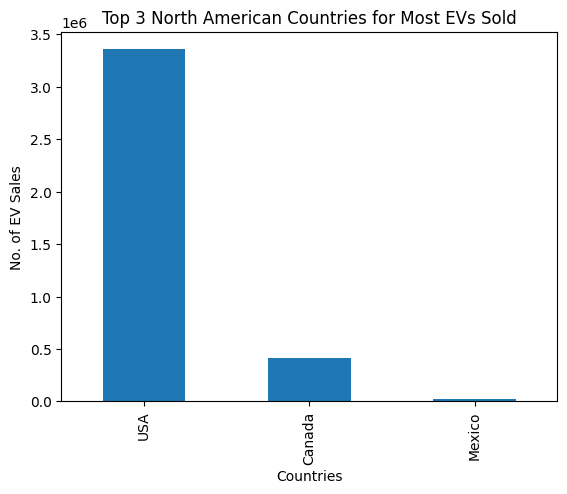

In [127]:
na_top = na_df.groupby(by = 'region').sum().drop(columns = ['continent','category','parameter','mode','powertrain','year','unit'])
na_top = na_top.sort_values(by='value', ascending=False)

na_plot = na_top.plot(kind = 'bar', y = 'value', legend = False,
                                   title = 'Top 3 North American Countries for Most EVs Sold'
                                   )

na_plot.set_ylabel('No. of EV Sales')
na_plot.set_xlabel('Countries')

The chart above shows USA dominating the North American EV market. With most of Tesla being produced in the US, and it being the number one EV brand used in the US, it tops the North American market as the top EV brands based on units sold. Since there are only three countries in the North American continent, only three countries are outputted above. 

##### Outcome 1.2.4: Top country(s) in Oceania with the most total global EV sales | [Back to Outcome 1](#outcome-1-ranking-continents-and-countries-based-on-ev-sales--back-to-outcomes)

Text(0.5, 0, 'Countries')

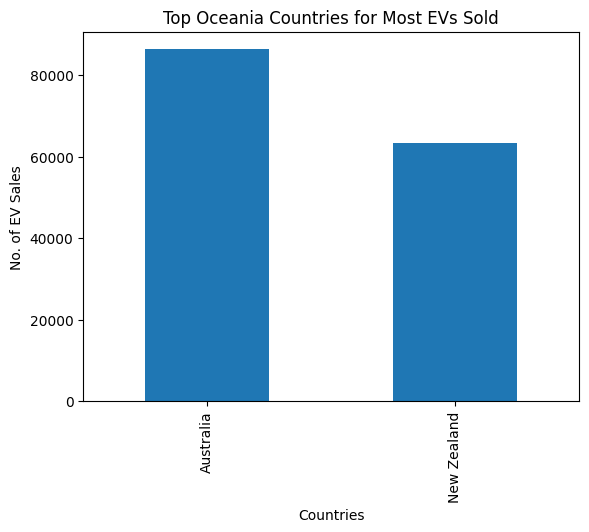

In [128]:
oceania_top = oceania_df.groupby(by = 'region').sum().drop(columns = ['continent','category','parameter','mode','powertrain','year','unit'])
oceania_top.sort_values(by='value', ascending=False)

oceania_plot = oceania_top.plot(kind = 'bar', y = 'value', legend = False,
                                   title = 'Top Oceania Countries for Most EVs Sold'
                                   )

oceania_plot.set_ylabel('No. of EV Sales')
oceania_plot.set_xlabel('Countries')

From the chart above, Australia sold the most EV units in Oceania after New Zealand. However, it is important to note that **Australia and New Zealand are the only unique Oceanian countries in the dataset**, mostly due to their significant EV sales globally. Other Oceanian countries weren't included in the dataset due to their smaller EV records. 

##### Outcome 1.2.5: Top country(s) in South America with the most total global EV sales | [Back to Outcome 1](#outcome-1-ranking-continents-and-countries-based-on-ev-sales--back-to-outcomes)

Text(0.5, 0, 'Countries')

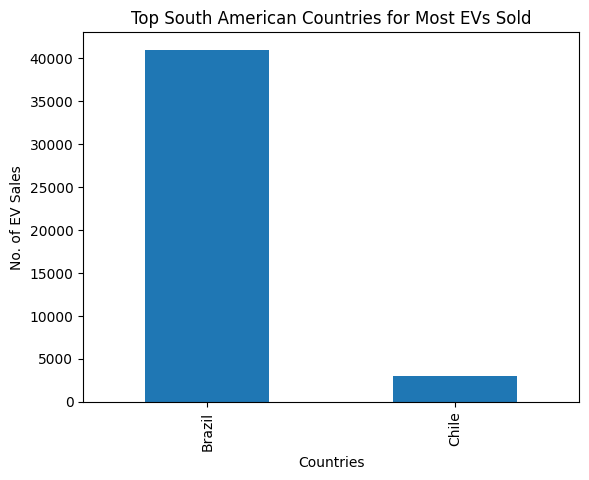

In [129]:
sa_top = sa_df.groupby(by = 'region').sum().drop(columns = ['continent','category','parameter','mode','powertrain','year','unit'])
sa_top.sort_values(by='value', ascending=False)

sa_plot = sa_top.plot(kind = 'bar', y = 'value', legend = False,
                                   title = 'Top South American Countries for Most EVs Sold'
                                   )

sa_plot.set_ylabel('No. of EV Sales')
sa_plot.set_xlabel('Countries')


From the chart above, Australia sold the most EV units in Oceania after New Zealand. However, it is important to note that **Australia and New Zealand are the only unique Oceanian countries in the dataset**, mostly due to their significant EV sales globally. Other Oceanian countries weren't included in the dataset due to their smaller EV records. 

##### Outcome 1.2.6: Top 10 countries for most EVs sold globally | [Back to Outcome 1](#outcome-1-ranking-continents-and-countries-based-on-ev-sales--back-to-outcomes)

Text(0.5, 0, 'Countries')

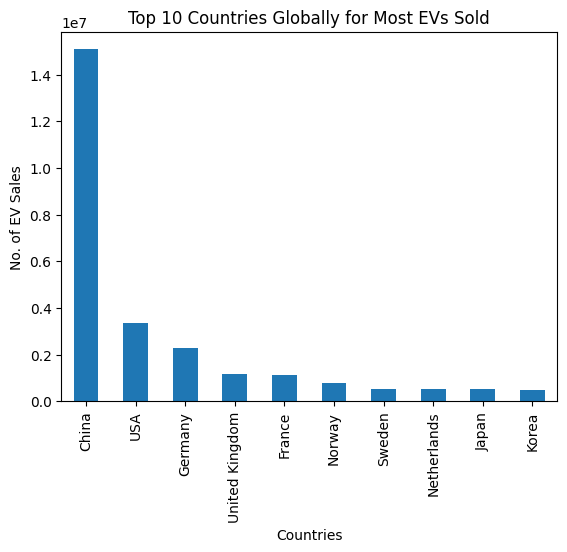

In [130]:
country_sales = outcome1_df.groupby(by = 'region').sum().drop(columns = ['continent','category','parameter','mode','powertrain','year','unit'])
country_sales_sorted = country_sales.sort_values(by = 'value', ascending = False)
country_sales_plot = country_sales_sorted[0:10].plot(kind = 'bar', y = 'value', legend = False,
                                   title = 'Top 10 Countries Globally for Most EVs Sold'
                                   )

country_sales_plot.set_ylabel('No. of EV Sales')
country_sales_plot.set_xlabel('Countries')

 #### **Outcome 2**: Year-by-Year Visualization of EV Sales and Stock Per Continent <br> and Top 10 Globally with an in-depth analysis on the European EV Market | [Back to Outcomes](#aim--outcomes)


In [131]:
outcome2_df = df[df.get('category') == 'Historical']
outcome2_df = (outcome2_df[(outcome2_df.get('parameter') == 'EV sales share') 
                           | (outcome2_df.get('parameter') == 'EV stock share') 
                           | (outcome2_df.get('parameter') == 'EV stock') 
                           | (outcome2_df.get('parameter') == 'EV sales')])
outcome2_df = outcome2_df[outcome2_df['region']!= 'World']
outcome2_df = outcome2_df.drop(columns = ['category','mode','powertrain','unit'])
outcome2_df = outcome2_df.pivot_table(index=['region', 'continent', 'year'], columns='parameter', values='value').reset_index()
outcome2_df

parameter,region,continent,year,EV sales,EV sales share,EV stock,EV stock share
0,Australia,Oceania,2011,49.000000,0.00650,49.000000,0.00046
1,Australia,Oceania,2012,125.000000,0.03000,150.000000,0.00280
2,Australia,Oceania,2013,145.000000,0.03400,295.000000,0.00540
3,Australia,Oceania,2014,660.000000,0.16000,940.000000,0.01700
4,Australia,Oceania,2015,880.000000,0.20000,1800.000000,0.03200
...,...,...,...,...,...,...,...
410,United Kingdom,Europe,2018,9116.571429,1.24650,27835.714286,0.29875
411,United Kingdom,Europe,2019,13141.666667,1.48225,37522.857143,0.38700
412,United Kingdom,Europe,2020,30762.666667,4.78650,61208.571429,0.62125
413,United Kingdom,Europe,2021,53981.666667,8.79250,106052.857143,0.99000


In [132]:
outcome2_df['year'].unique().max()

2022

After querying the dataframe for Outcome 2, the latest year available is **2022**.

##### Outcome 2.1: EV Sales and Stock Year-by-Year Visualization (Per Continent) | [Back to Outcome 2](#outcome-2-year-by-year-visualization-of-ev-sales-and-stock-per-continent-and-top-10-globally-with-an-in-depth-analysis-on-the-european-ev-market--back-to-outcomes)

Since we will be plotting a lot of graphs for this outcome, we wrote a **plotter** function which takes in the dataframe outcome2_df, our continent of interest and our parameter of interest (EV sales or EV stock). Due to the nature of this dataset having some incomplete data for some countries, we filled such null values with 0. 

In [133]:
def oc2_plotter(df, continent, parameter):
    countries = df[df['continent'] == continent].get('region').unique()
    years = df['year'].unique()
    years.sort()
    plt.figure(figsize =(14,6))
    
    markers = ['o','s','*','v','D','x']

# Loops through each country and plot its data
    for idx, country in enumerate(countries):
    # get the EV sales data for the current country and align it with the full range of years
        country_data = df[df['region'] == country][['year', parameter]]
    # reindex the data to include all years, filling missing years with 0
        country_data = country_data.set_index('year').reindex(years, fill_value=0)
    # choosing marker style
        marker_style = markers[idx % len(markers)] if idx >= 5 else None
        
    
    # Superimpose each country's plot into the chart
        plt.plot(years, country_data[parameter], label=country, marker = marker_style)
    
# Plotting the data
    plt.xlabel('Year', fontsize = 14); plt.ylabel(parameter, fontsize = 14)
    par_split = parameter.split()
    plt.title(f'{par_split[0]} {par_split[1].title()} in {continent} from {years[0]} to {years[-1]}',fontsize = 16)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

##### Outcome 2.1.1: Visualization of EV sales and stock in Oceania | [Back to Outcome 2](#outcome-2-year-by-year-visualization-of-ev-sales-and-stock-per-continent-and-top-10-globally-with-an-in-depth-analysis-on-the-european-ev-market--back-to-outcomes)

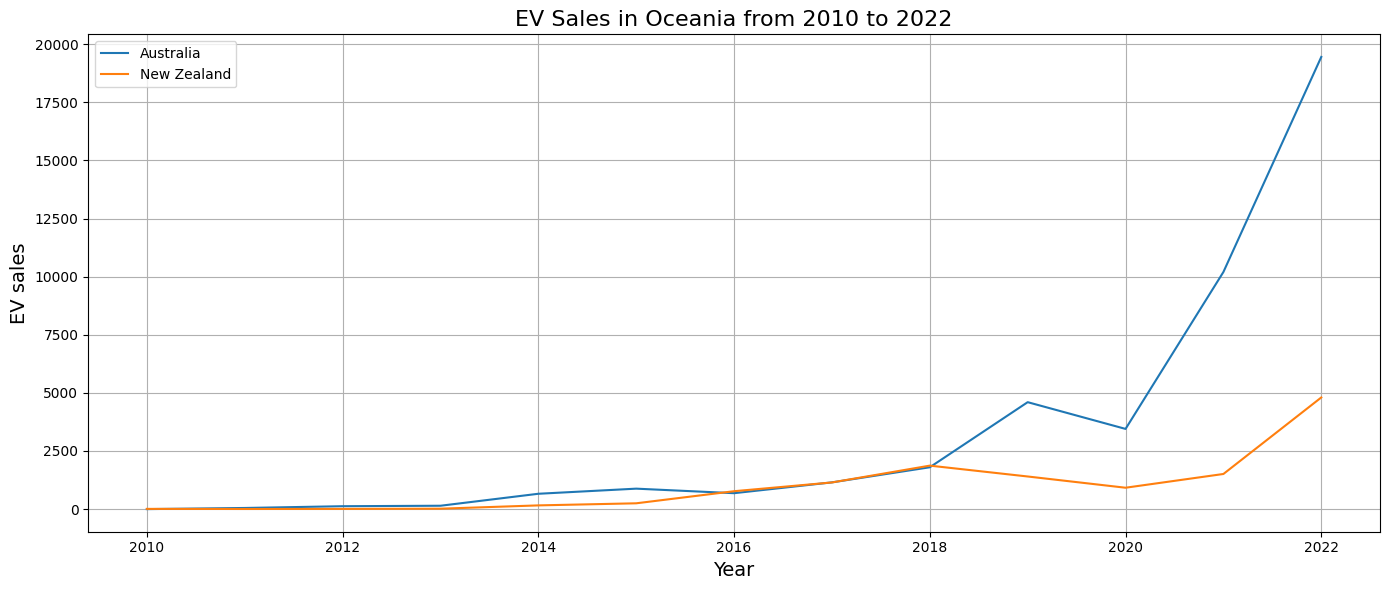

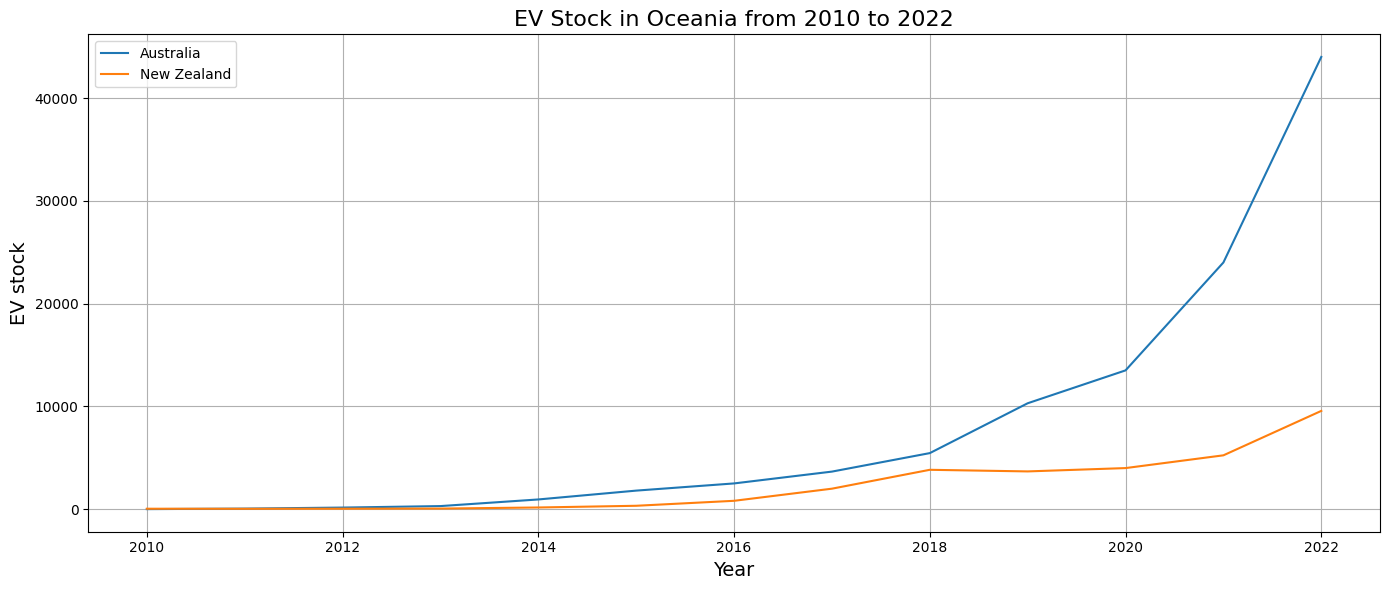

In [134]:
oc2_plotter(outcome2_df, 'Oceania', 'EV sales')
oc2_plotter(outcome2_df, 'Oceania', 'EV stock')

New Zealand had a similar sales and stock growth trend with (and at some point surpassing) Australia's considering that New Zealand's population is roughly only one-fifth of Australia's. Eventually, Australia caught up and gained a significant EV sales gap to New Zealand. In 2020, both countries endured a drop in EV sales, most likely due to the COVID-19 pandemic.

##### Outcome 2.1.2: Visualization of EV Sales and Stock in Europe | [Back to Outcome 2](#outcome-2-year-by-year-visualization-of-ev-sales-and-stock-per-continent-and-top-10-globally-with-an-in-depth-analysis-on-the-european-ev-market--back-to-outcomes)

Amongst all of the continents, European countries are best-represented in this dataset and due to this fact, we can extend our discussion for this continent in [Outcome 2.3](#outcome-23-a-deeper-analysis-on-the-european-ev-market).

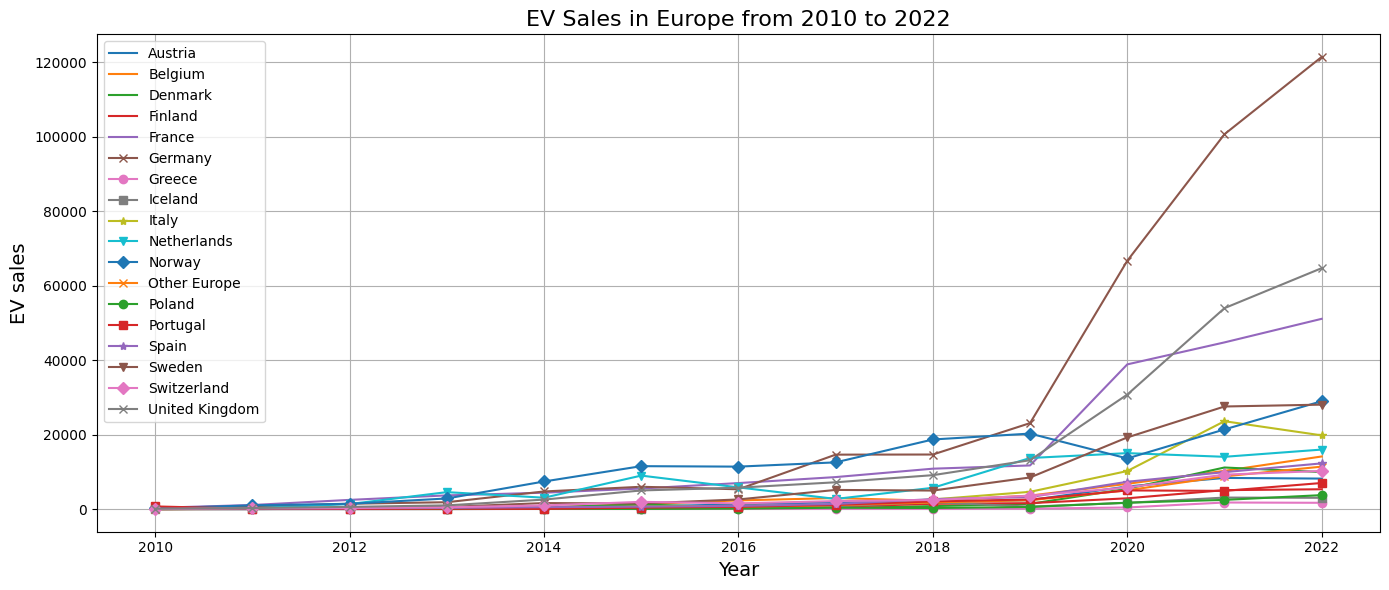

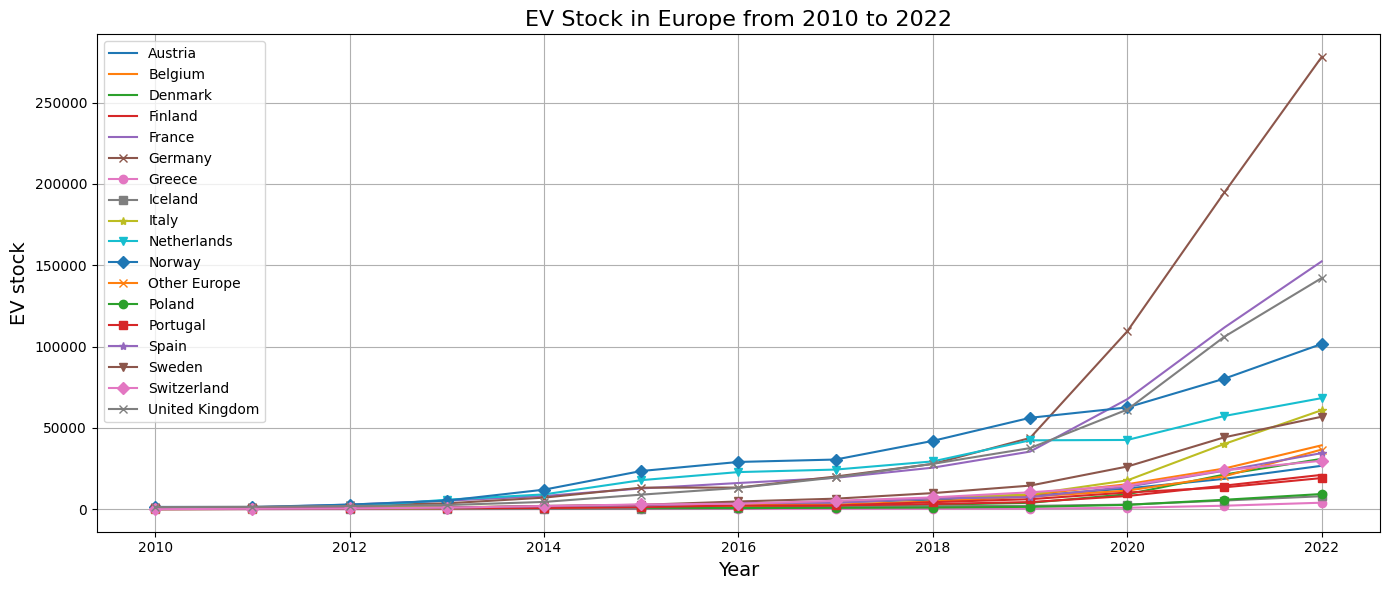

In [135]:
oc2_plotter(outcome2_df, 'Europe', 'EV sales')
oc2_plotter(outcome2_df, 'Europe', 'EV stock')

The graph shows that the top three countries for EV sales—**Germany, the U.K., and France**—experienced a notable surge starting in 2019. Other nations also saw growth, though at a steadier pace. During this period, new EV brands like Tesla gained momentum in Europe, while established European manufacturers such as Mercedes and Renault launched their own EV models. Additionally, European policymakers introduced tax exemptions and subsidies for EV buyers, making electric vehicles more accessible and attractive to consumers across the continent.

##### Outcome 2.1.3: Visualization of EV sales and stock in South America | [Back to Outcome 2](#outcome-2-year-by-year-visualization-of-ev-sales-and-stock-per-continent-and-top-10-globally-with-an-in-depth-analysis-on-the-european-ev-market--back-to-outcomes)

In [136]:
SA_Countries_in_Dataframe = df[df['continent']=='South America']['region'].unique()
print(f"Number of South American Countries in Original Dataframe: {len(SA_Countries_in_Dataframe)}")
print(f"Countries: {SA_Countries_in_Dataframe}")

Number of South American Countries in Original Dataframe: 2
Countries: ['Brazil' 'Chile']


Unfortunately, this dataset only contains Brazil and Chile as the countries listed in South America despite the continent having more countries.

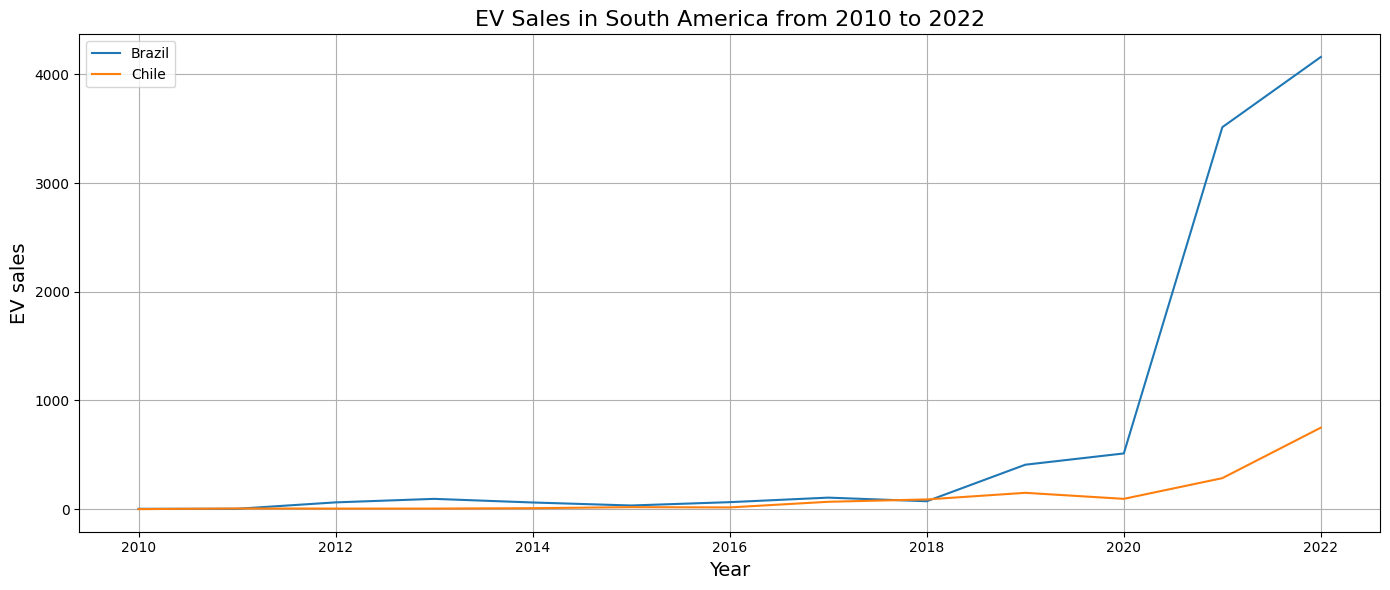

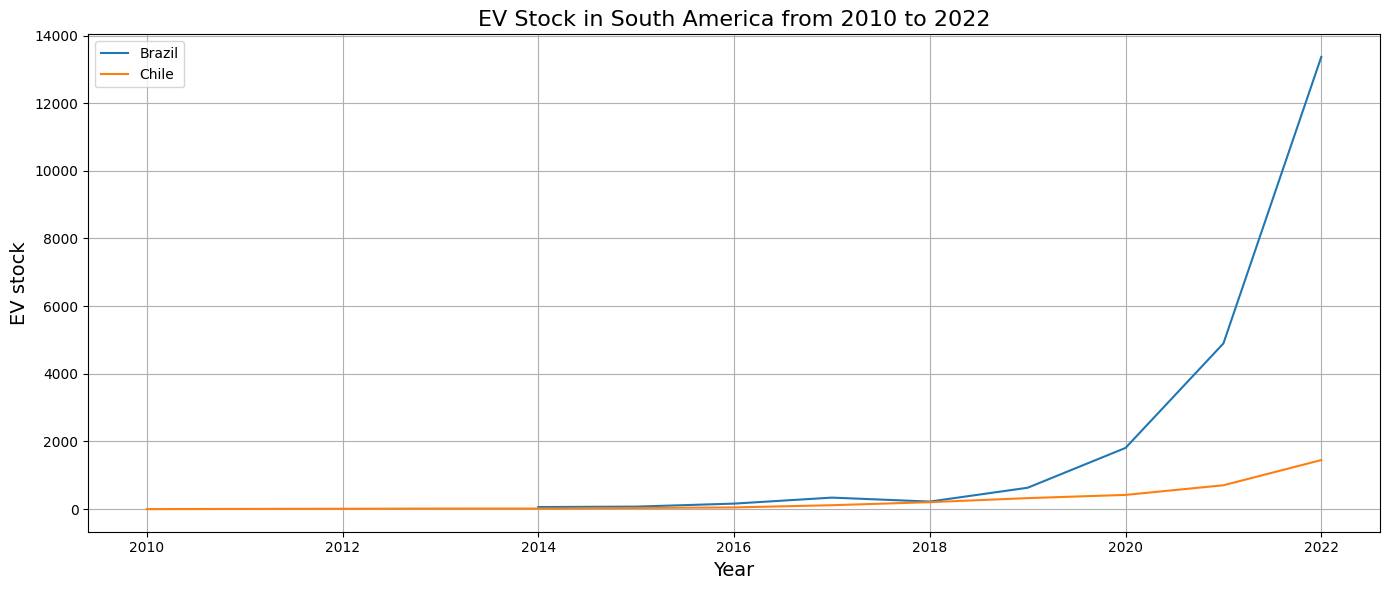

In [137]:
oc2_plotter(outcome2_df, 'South America', 'EV sales')
oc2_plotter(outcome2_df, 'South America', 'EV stock')

Brazil dominates both EV sales and stock, especially after 2018. Prior to 2018 though, Chile and Brazil had similar growths, with Chile even matching Brazil's EV sales in 2015. It's also notable that South America's EV growth has **lagged behind that of other continents**, with significant growth occurring only after 2018.

##### Outcome 2.1.4: Visualization of EV sales and stock in North America | [Back to Outcome 2](#outcome-2-year-by-year-visualization-of-ev-sales-and-stock-per-continent-and-top-10-globally-with-an-in-depth-analysis-on-the-european-ev-market--back-to-outcomes)

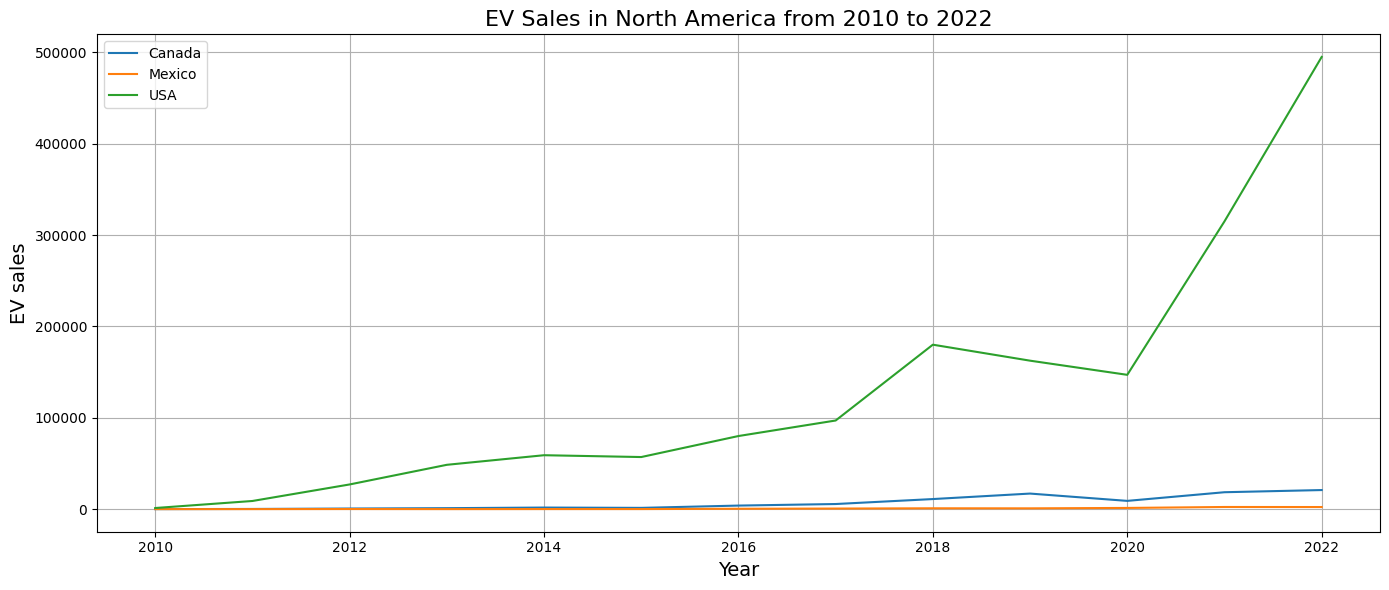

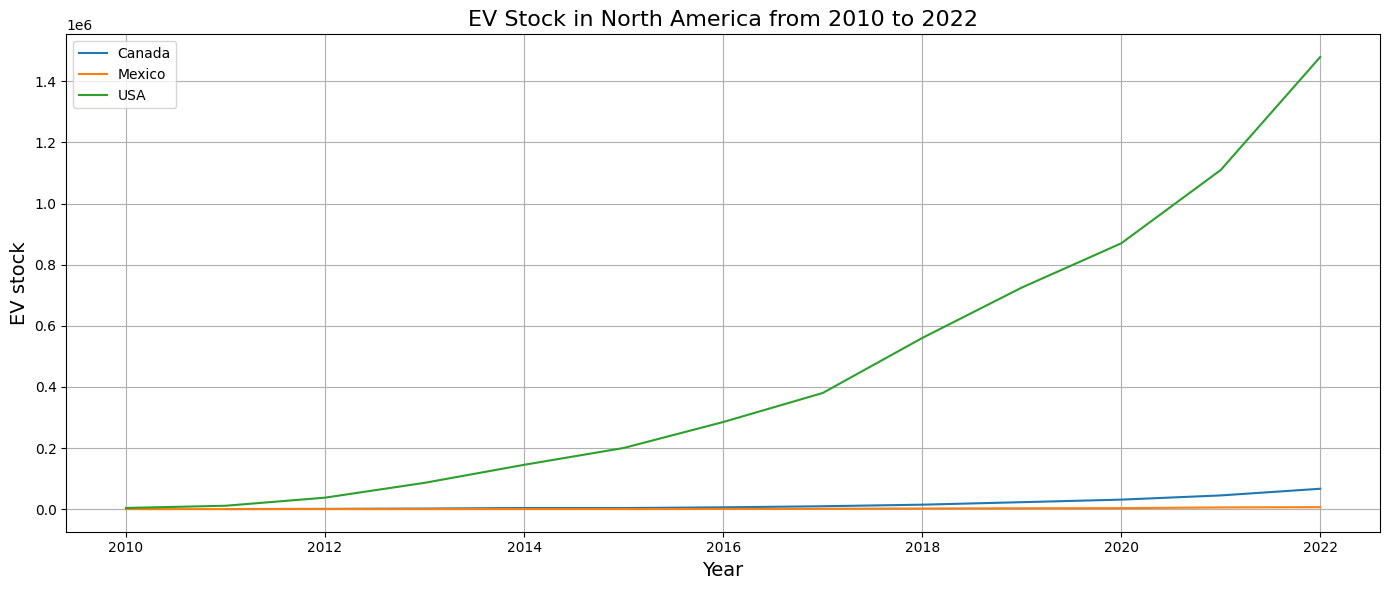

In [138]:
oc2_plotter(outcome2_df, 'North America', 'EV sales')
oc2_plotter(outcome2_df, 'North America', 'EV stock')

The top graph (EV sales) illustrates a significant surge in the U.S., especially post-2020, while **sales in Canada and Mexico remained relatively flat**. The bottom graph reflects the cumulative EV stock, where the U.S. experienced steady growth early in the collection of data, despite a slight sales dip between 2018 and 2020, leading to a substantial lead over Canada and Mexico in terms of total EV stock by 2022.

##### Outcome 2.1.5: Visualization of EV sales and stock in Asia | [Back to Outcome 2](#outcome-2-year-by-year-visualization-of-ev-sales-and-stock-per-continent-and-top-10-globally-with-an-in-depth-analysis-on-the-european-ev-market--back-to-outcomes) 

In [139]:
Asian_Countries_in_Dataframe = df[df['continent']=='Asia']['region'].unique()
print(f"Number of Asian Countries in Original Dataframe: {len(Asian_Countries_in_Dataframe)}")
print(f"Countries: {Asian_Countries_in_Dataframe}")

Number of Asian Countries in Original Dataframe: 8
Countries: ['China' 'India' 'Indonesia' 'Israel' 'Japan' 'Korea' 'Thailand' 'Turkiye']


In [140]:
outcome2_df[outcome2_df['region'].isin(['Indonesia', 'Thailand'])]

parameter,region,continent,year,EV sales,EV sales share,EV stock,EV stock share


Unfortunately, this dataset only contains a 6 countries from Asia with EV Sales and Stock available. Thus Indonesia and Thailand aren't included

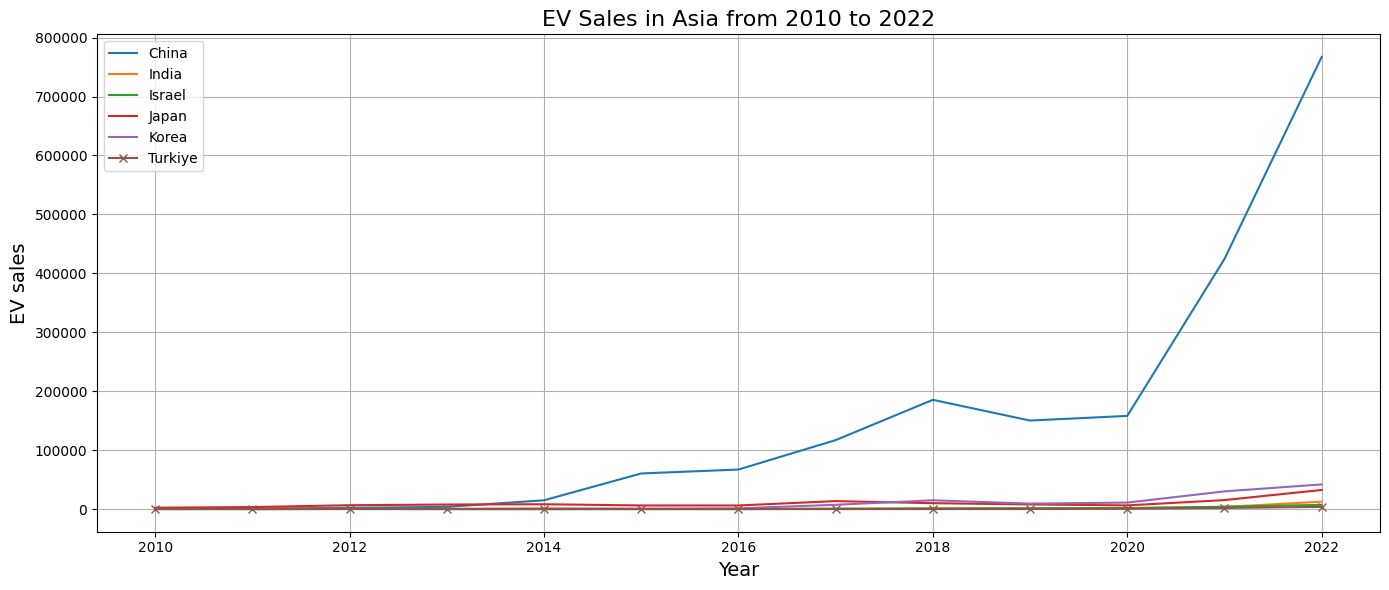

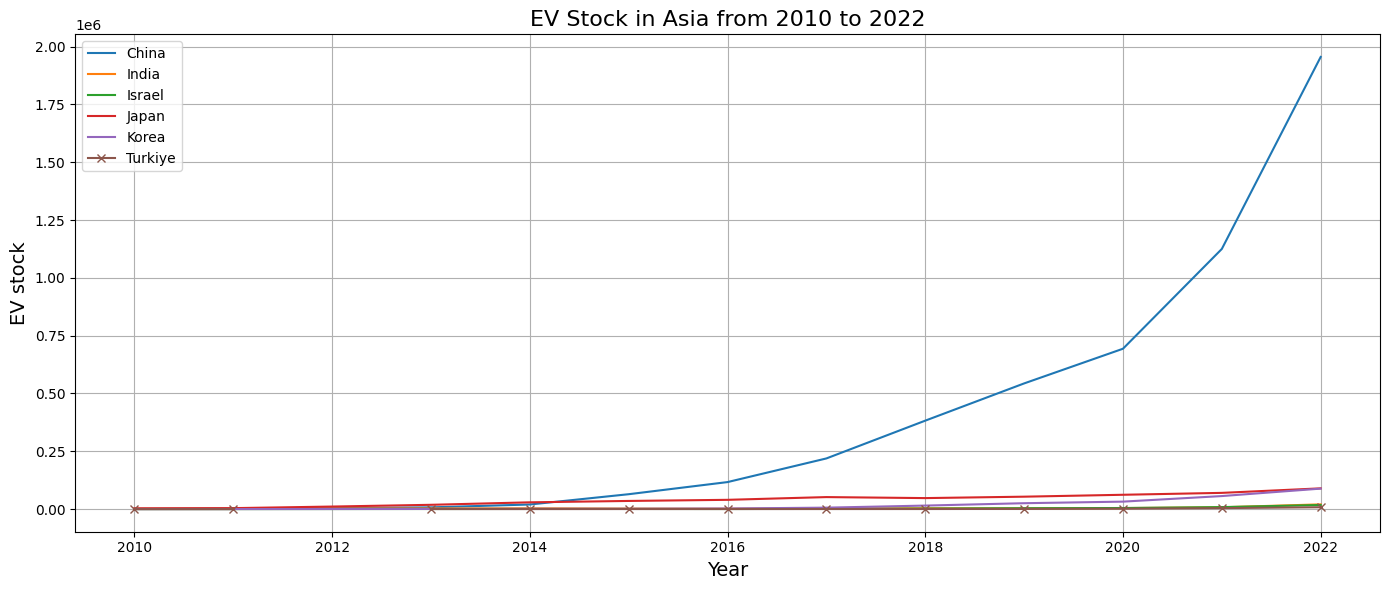

In [141]:
oc2_plotter(outcome2_df, 'Asia', 'EV sales')
oc2_plotter(outcome2_df, 'Asia', 'EV stock')

The graph shows the rapid increase in electric vehicle (EV) stock in Asia from 2010 to 2022, with China experiencing the most significant growth compared to other countries such as India, Israel, Japan, Korea, and Türkiye. China's dominant EV growth is attributed to **substantial government subsidies for domestic automakers** and the success of Tesla, which established a major manufacturing facility in Shanghai, boosting the production and availability of Tesla vehicles like the Model 3 and Model Y in the region.

##### Outcome 2.1.6: Visualization of EV sales and stock in Africa | [Back to Outcome 2](#outcome-2-year-by-year-visualization-of-ev-sales-and-stock-per-continent-and-top-10-globally-with-an-in-depth-analysis-on-the-european-ev-market--back-to-outcomes) 

In [142]:
African_Countries_in_Dataframe = df[df['continent']=='Africa']['region'].unique()
print(f"Number of African Countries in Original Dataframe: {len(African_Countries_in_Dataframe)}")
print(African_Countries_in_Dataframe)


Number of African Countries in Original Dataframe: 1
['South Africa']


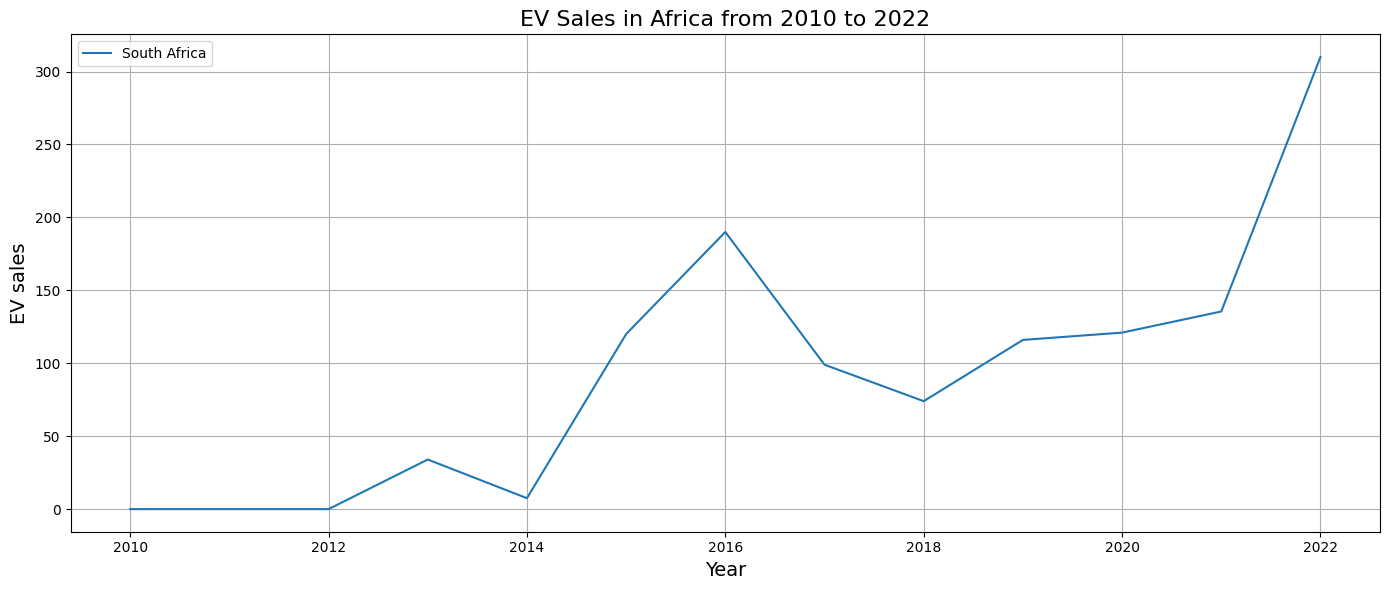

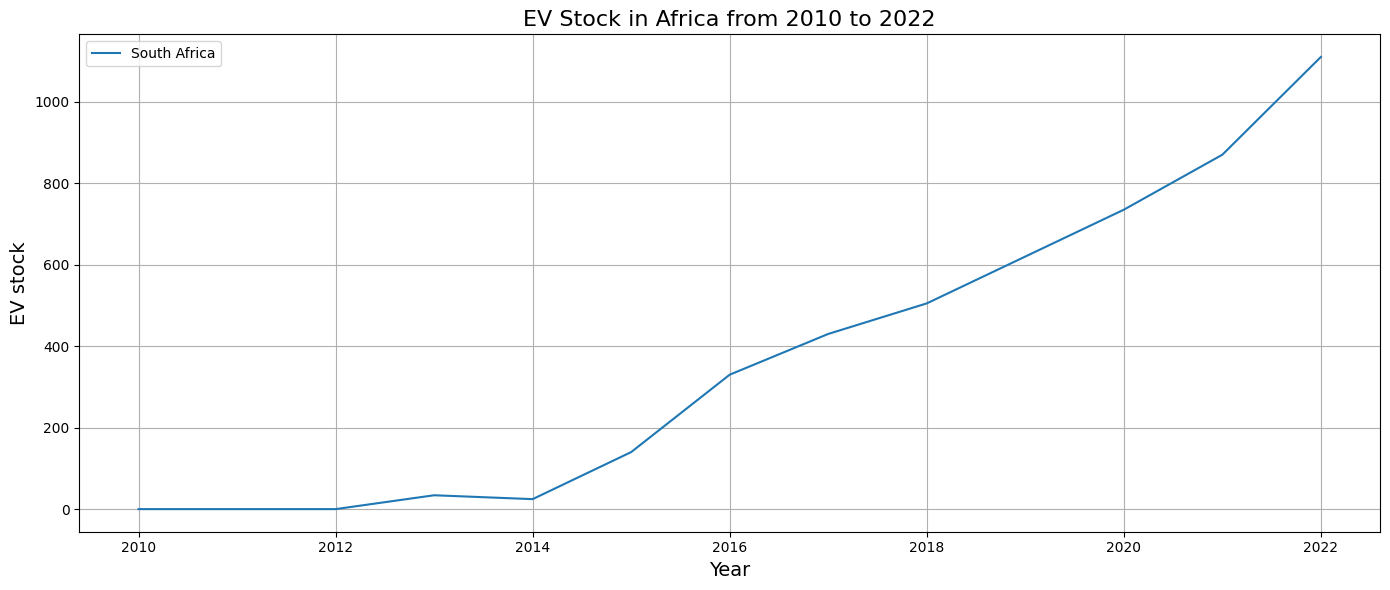

In [143]:
oc2_plotter(outcome2_df, 'Africa', 'EV sales')
oc2_plotter(outcome2_df, 'Africa', 'EV stock')

South Africa has endured a steady growth of EV stock despite having fluctuating EV sales, showing promising signs that the country is actively reducing other type of powertrains. Note that, in  2022, the total amount of both parameters is **far less than other continents**.

##### Outcome 2.1.6: Visualization of EV sales and stock of the rest of the world | [Back to Outcome 2](#outcome-2-year-by-year-visualization-of-ev-sales-and-stock-per-continent-and-top-10-globally-with-an-in-depth-analysis-on-the-european-ev-market--back-to-outcomes)

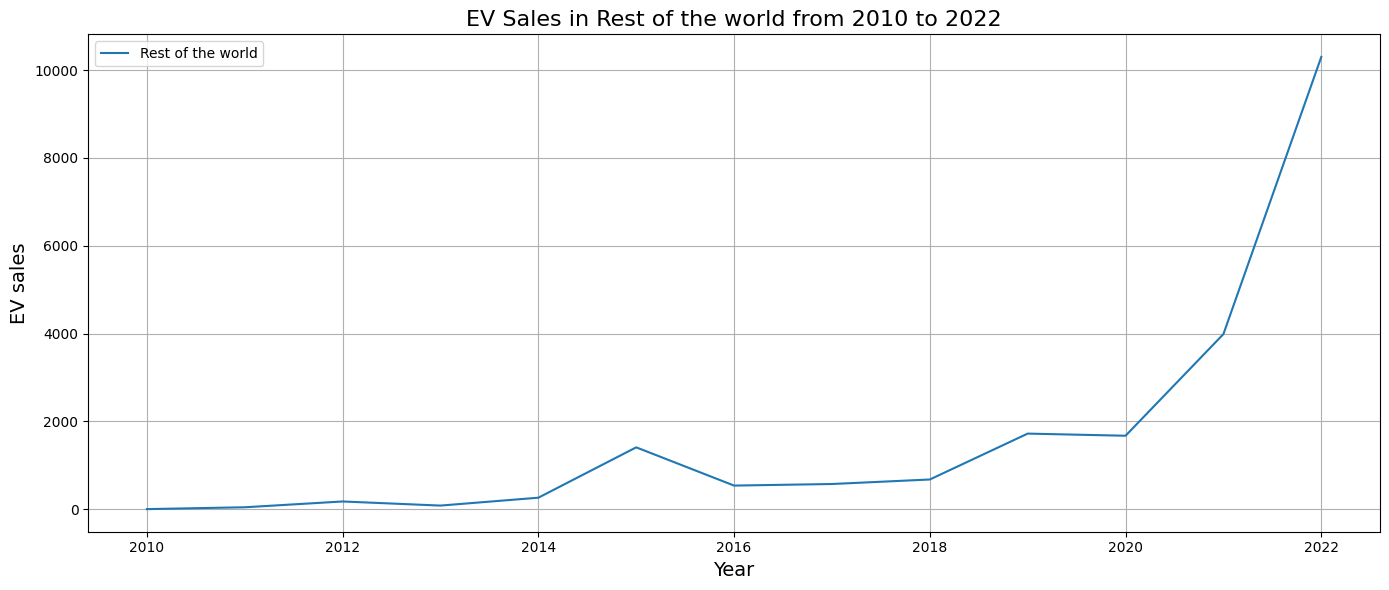

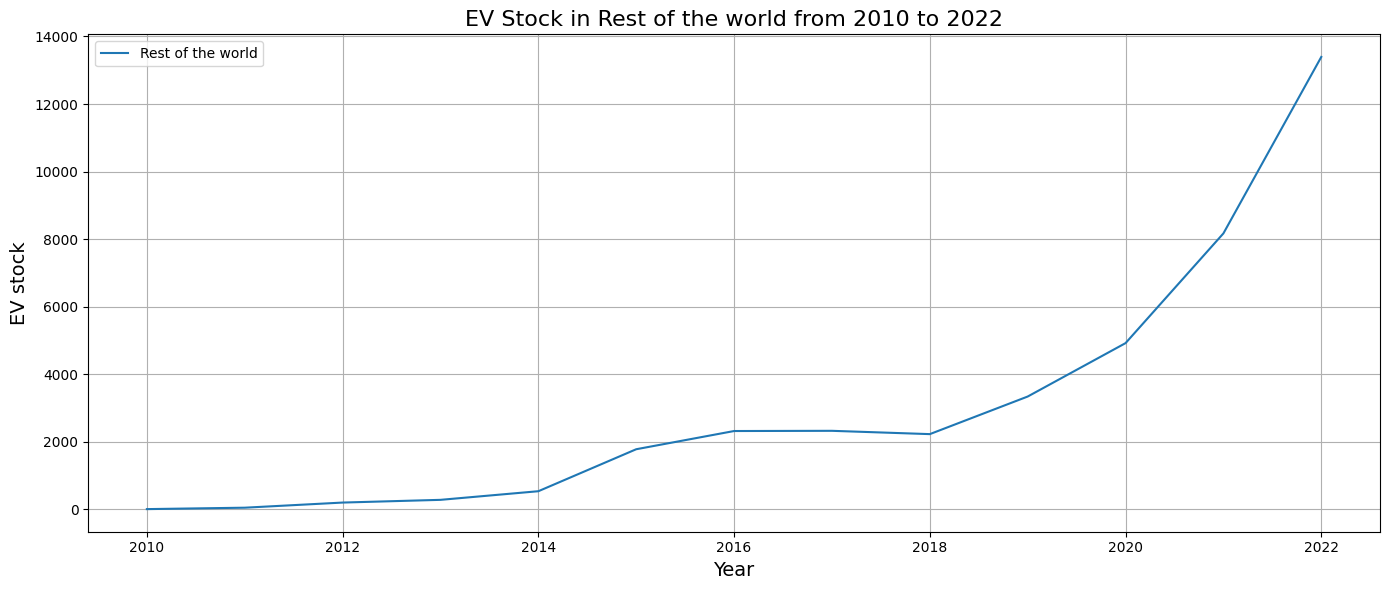

In [144]:
oc2_plotter(outcome2_df, 'Rest of the world', 'EV sales')
oc2_plotter(outcome2_df, 'Rest of the world', 'EV stock')

The rest of world has seen a recent rise in both sales and stock. Despite this, the total number of both parameters as of 2022 is **far less** than that of Asia, Europe and North America's

#### Outcome 2.2: EV Sales and Stock Visualization of the top Top 10 countries for most EVs sold globally from Outcome 1.2.6 | [Back to Outcome 2](#outcome-2-year-by-year-visualization-of-ev-sales-and-stock-per-continent-and-top-10-globally-with-an-in-depth-analysis-on-the-european-ev-market--back-to-outcomes)

In [145]:
top_10_oc2 = country_sales_sorted[0:10]
top_10_oc2

,value
region,
China,15085428.0
USA,3355000.0
Germany,2281566.0
United Kingdom,1184617.0
France,1143804.0
Norway,769186.0
Sweden,525582.0
Netherlands,521765.0
Japan,508132.0


In order to plot Outcome 2.2, a modified version of oc2_plotter was written, such that it now takes an additional dataframe, top_10_oc2.

In [176]:
def oc2_plotter_top10(df, another_df, parameter):
    # Finds the index of the dataframe top_10_oc2
    countries = another_df.index
    # Sets years to unique in case any duplicate year values
    years = df['year'].unique()
    years.sort()
    plt.figure(figsize =(16,9))
    # Provides marker types to be plotted
    markers = ['o','s','*','v','D','x']
    for idx, country in enumerate(countries):
        # Queries the dataframe into countries and parameters of interest
        country_data = df[df['region'] == country][['year', parameter]]
        # Sets value to zero for null data points
        country_data = country_data.set_index('year').reindex(years, fill_value=0)
        marker_style = markers[idx % len(markers)] if idx >= 5 else None
        # Plots the data against years
        plt.plot(years, country_data[parameter], label=country, marker = marker_style)
        
    # Plot the aligned data
    plt.xlabel('Year', fontsize = 14); plt.ylabel(parameter, fontsize = 14)
    par_split = parameter.split()
    plt.title(f'{par_split[0]} {par_split[1].title()} of Top 10 Countries (by EV Sold) from {years[0]} to {years[-1]}',fontsize = 16)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

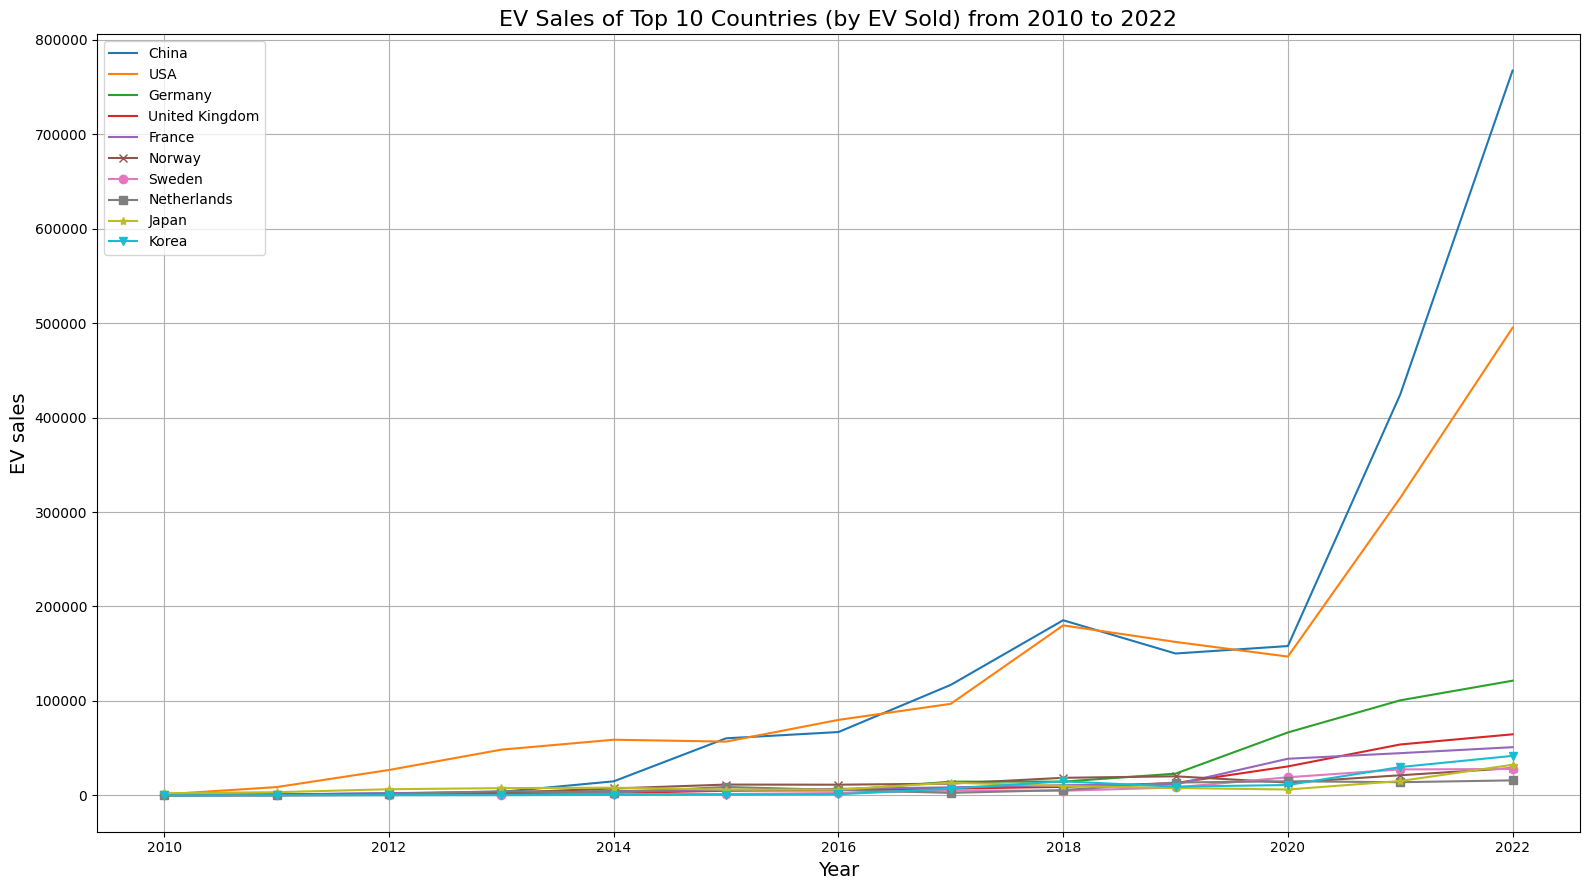

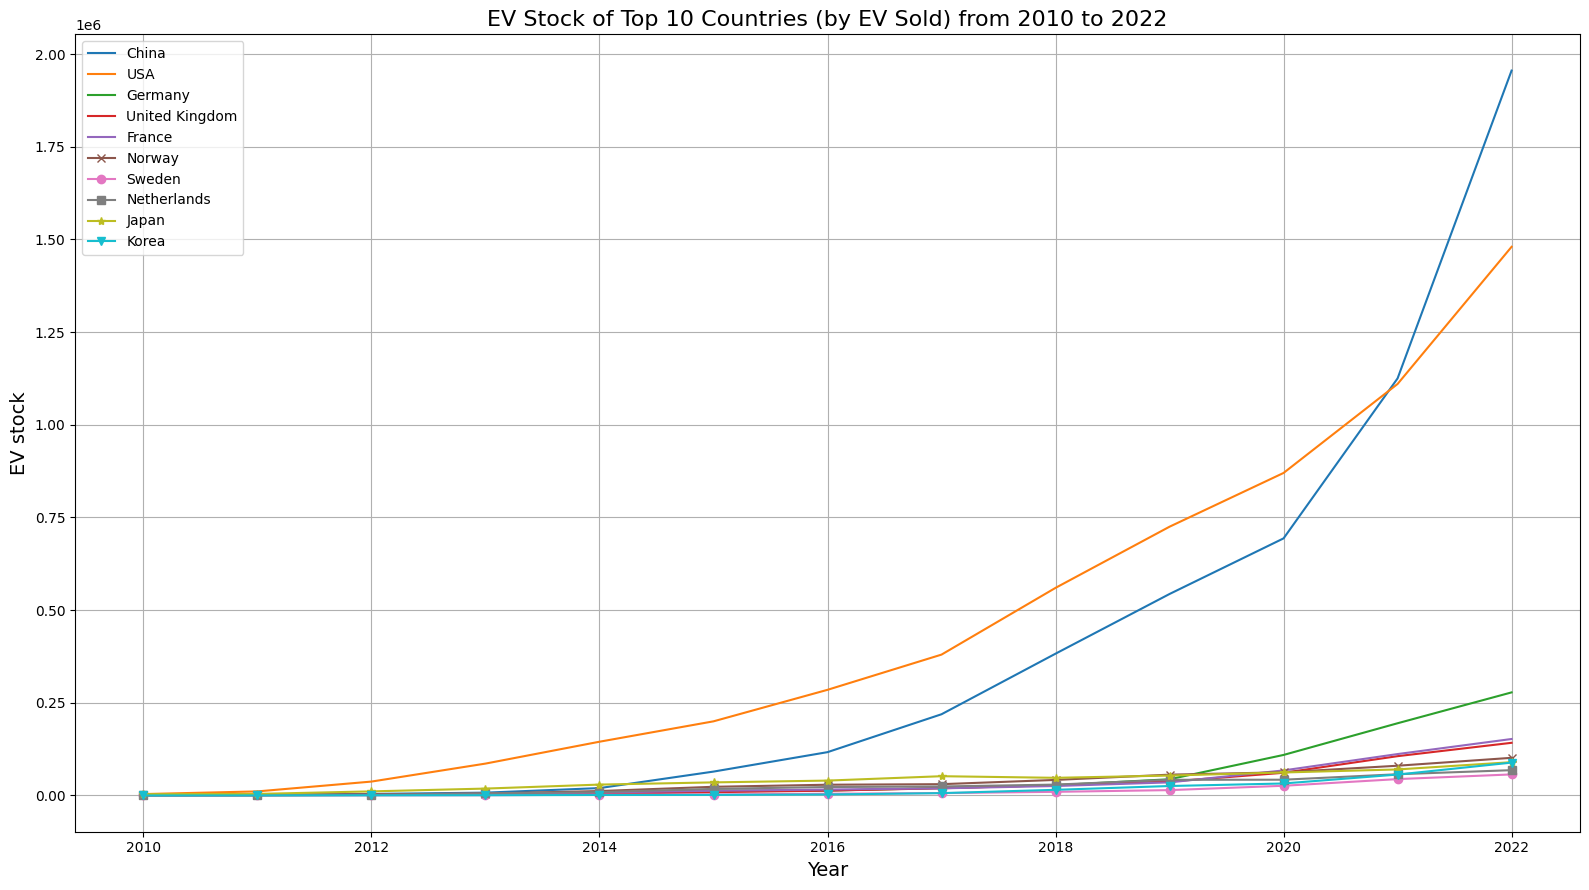

In [177]:
oc2_plotter_top10(outcome2_df, top_10_oc2, 'EV sales')
oc2_plotter_top10(outcome2_df, top_10_oc2, 'EV stock')


The top graph shows that China has seen a dramatic rise in EV sales starting around 2018, with a significant acceleration after 2020, far outpacing the U.S. by 2022. In contrast, while the U.S. also experienced steady growth, it was more gradual compared to China’s explosive increase. The bottom graph reflects this pattern in cumulative EV stock, where China surpasses the U.S. around 2018 and continues to widen the gap. It's worth noting that the **largest economies in North America, Asia, and Europe—China, the USA, and Germany respectively—lead the top three positions** in the chart.

#### Outcome 2.3: A deeper analysis on the European EV Market | [Back to Outcome 2](#outcome-2-year-by-year-visualization-of-ev-sales-and-stock-per-continent-and-top-10-globally-with-an-in-depth-analysis-on-the-european-ev-market--back-to-outcomes)

Recall the following figures from [Outcome 2.1.2](#outcome-212-visualization-of-ev-sales-and-stock-in-europe), where the European continent contains much more data relative to other continents. So it is only fit that we take a look into that data and highlight on significant trends of select European countries.

An extended version of the plotter in Outcome 2.1 now takes the cutoff year and cutoff EV sales number, so that it only plots countries that has EV sales **less than or equal** to the EV sales cutoff of said year. <br>
The default cutoff year and cutoff sales number of that year is set to 2022 and 20,000 respectively.

In [180]:
def oc2_plotter_231(df, continent, parameter, year_cutoff = 2022, sales_num = 20000):
    # Queries the dataframe according to the cutoff year and countries that has EV sales less 
    # that or equal to the cutoff sales number
    top_countries = df[(df['year'] == year_cutoff) & (outcome2_df['EV sales'] <= sales_num)]
    countries = top_countries[top_countries['continent'] == continent]['region'].unique()
    
    # Sets years values
    years = df['year'].unique()
    years.sort()
    
    # Sets figure size 
    plt.figure(figsize =(16,9))
    # Sets marker types
    markers = ['o','s','*','v','D','x']

# Loop through each country and plot its data
    for idx, country in enumerate(countries):
    # Get the EV sales data for the current country and align it with the full range of years
        country_data = df[df['region'] == country][['year', parameter]]
    # Reindex the data to include all years, filling missing years with 0
        country_data = country_data.set_index('year').reindex(years, fill_value=0)
    # Choosing marker style
        marker_style = markers[idx % len(markers)] if idx >= 5 else None
        
    
    # Superimpose each country's plot into the chart
        plt.plot(years, country_data[parameter], label=country, marker = marker_style)
    
# Plot the aligned data
    plt.xlabel('Year', fontsize = 14); plt.ylabel(parameter, fontsize = 14)
    par_split = parameter.split()
    plt.title(f'{par_split[0]} {par_split[1].title()} in {continent} from {years[0]} to {year_cutoff} for Sales of Less than {sales_num}',fontsize = 16)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

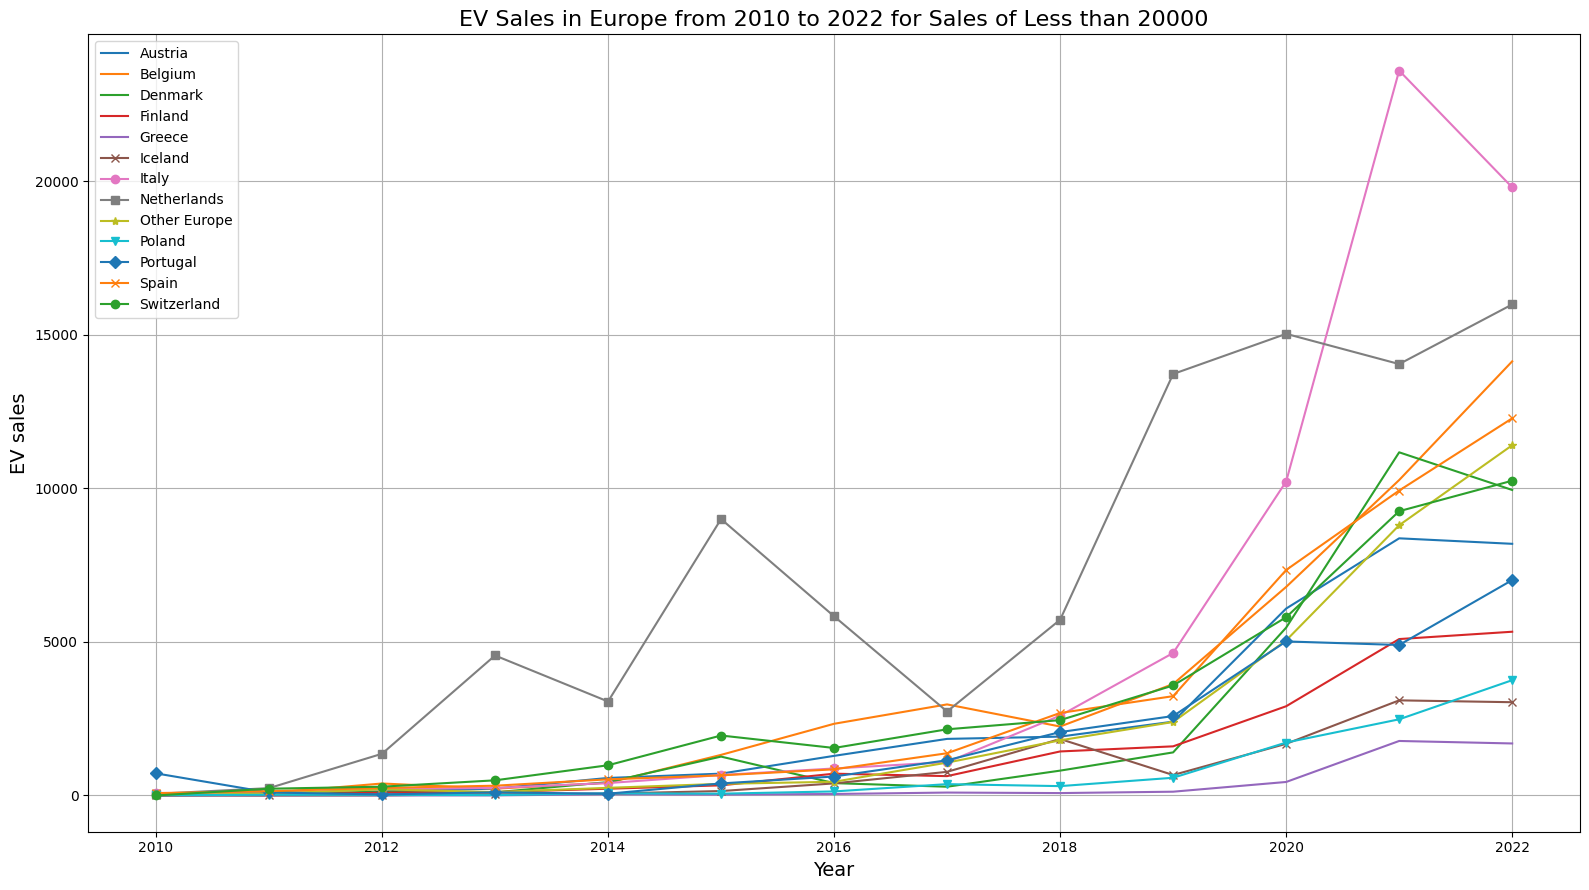

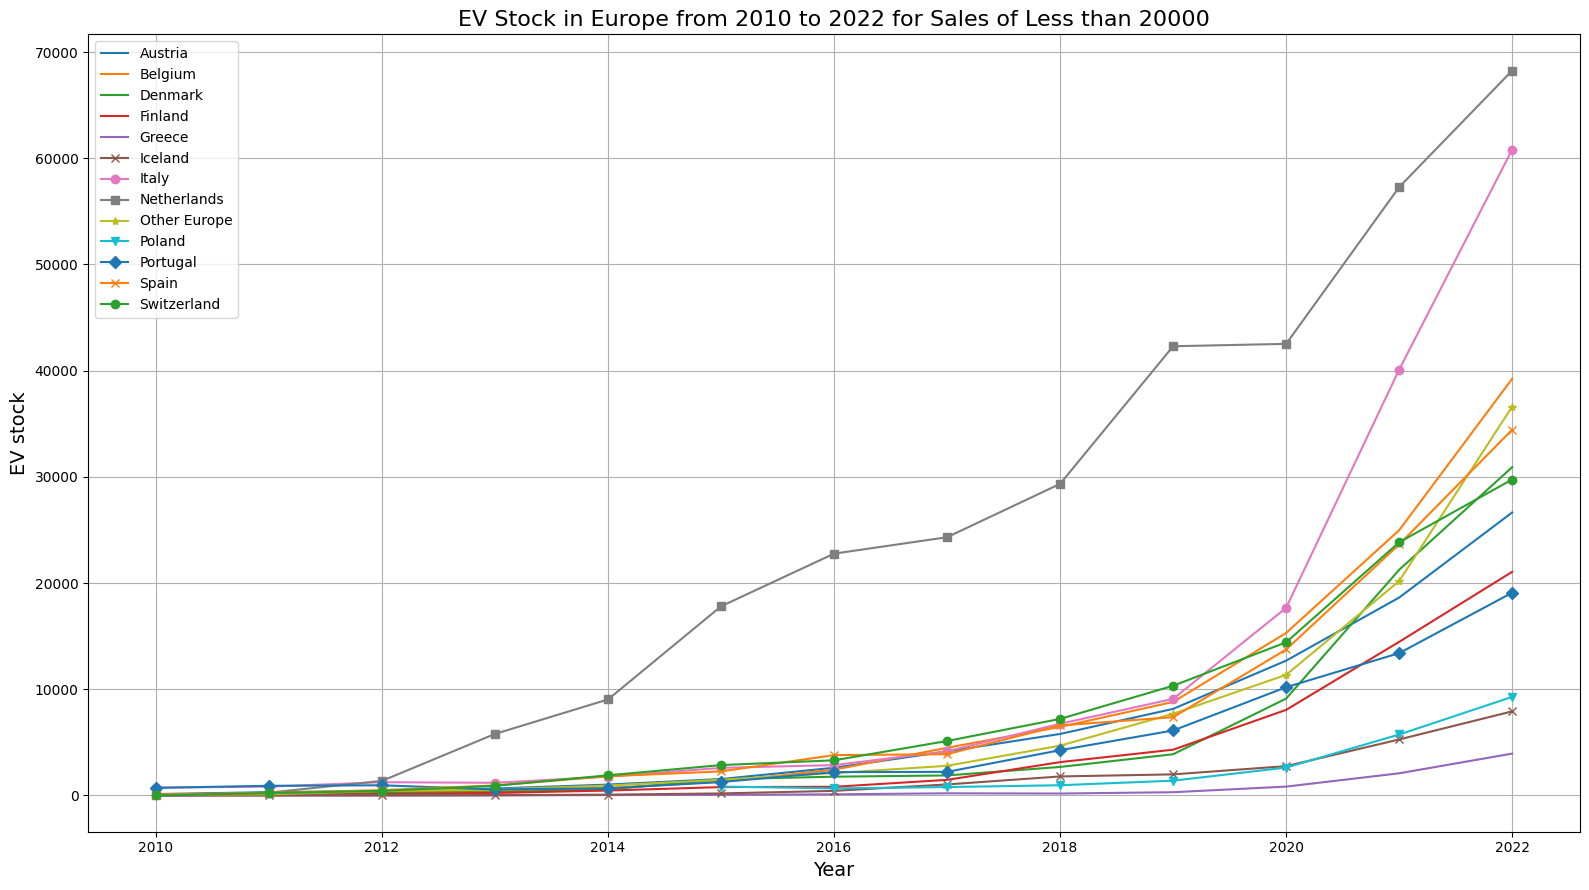

In [181]:
oc2_plotter_231(outcome2_df, 'Europe', 'EV sales')
oc2_plotter_231(outcome2_df, 'Europe', 'EV stock')


The first chart above showcases the change in EV sales year-per-year for European countries who **sold less than 20,000 units**. Overall, the most notable countries are Netherlands and Italy, while the other countries had their EV sales grow steadily, along with their EV stock in response. From 2010 to 2022, the chart shows that the Netherlands has the highest EV sales among this low-sales subgroup the majority of the time. While there were small plummets, sales decreased by more than 50% from 2014 to 2017, before increasing again until 2022. However, Italy overtook Netherlands for the highest EV sales after growing exponentially on 2020, suggesting an increase in demand for EVs in Italy. 

The second chart is a reflection of the EV stock for the EV sales found in the first chart. Apparently, Netherlands consistently had the highest EV stock from 2010 to 2022, despite having not led EV sold in 2022. **After 2020, some countries EV sales steadied or even dropped, all while EV stock remained increasing**. This suggested producers expected demand to increase instead of plummet. Alternatively, consumers may be optimistic that demand will go back on the positive trend. Lastly, while Italy's sales overtook Netherlands, the second chart shows that their EV stock may take beyond 2022 to catch up to the Netherlands. 

 #### **Outcome 3**: EV Powertrains Sales and Stocks of Top EV Countries | [Back to Outcomes](#aim--outcomes)

In [150]:
outcome3_df = df[(df.get('category') == 'Historical') & ((df.get('parameter') == 'EV sales') | (df.get('parameter') == 'EV stock'))]

To figure out the countries that will be analyzed in this outcome, the top EV countries are based on their overall [EV sales globally from 2011 to 2022](#outcome-126-top-10-countries-for-most-evs-sold-globally) found in Outcome 1. 

China, USA, and Germany, the United Kingdom, and France are the overall top countries. However, many seem to forget that "EV" itself is a wide term, encompassing different types of electric vehicles. Hybrid electric vehicles, fully electric vehicles, and many more are different types or "powertrains".

In [151]:
outcome3_df = outcome3_df.drop(columns = ['continent','category','mode','unit'])
outcome3_df.get('powertrain').unique()

array(['BEV', 'PHEV'], dtype=object)

In this dataset, BEV and PHEV are two different powertrains that have recorded data, however how much these powertrains actually contribute to the overall EV market of a country is still unknown. **BEV** or a "battery electric vehicle" is an **electric vehicle that runs on battery alone**, or fully electric vehicles. **PHEV** or a "plug-in hybrid electric vehicle" is the **hybrid electric vehicles** we commonly know, where it primarily uses combustion engines, and the battery can only travel short distances. In this outcome, the EV sales and EV stock of specific powertrains in top EV countries will be explored.

In [152]:
outcome3_df.groupby('region').count()

,parameter,powertrain,year,value
region,,,,
Australia,46,46,46,46
Austria,115,115,115,115
Belgium,143,143,143,143
Brazil,69,69,69,69
Canada,105,105,105,105
Chile,42,42,42,42
China,180,180,180,180
Denmark,146,146,146,146
Finland,94,94,94,94


Based on the data count table above, it can be seen that China and United Kingdom are the best-represented countries in the dataset. For example, even though the US has the second-highest global EV sales, the data count is only 50, meaning the **all-around data is not represented well despite large values**. Hence, this outcome will focus on the powertrains of both China and the UK **only**. 

##### Outcome 3.1: China's Powertrains | [Back to Outcome 3](#outcome-3-ev-powertrains-sales-and-stocks-of-top-ev-countries--back-to-outcomes)

In [153]:
china_df = outcome3_df[(outcome3_df.get('region') == 'China')]
china_df

,region,parameter,powertrain,year,value
984,China,EV stock,BEV,2010,16.0
985,China,EV sales,PHEV,2010,340.0
986,China,EV stock,PHEV,2010,340.0
987,China,EV sales,BEV,2010,4.9
988,China,EV sales,BEV,2010,120.0
...,...,...,...,...,...
1583,China,EV stock,BEV,2022,460000.0
1584,China,EV stock,PHEV,2022,1700.0
1585,China,EV sales,BEV,2022,4400000.0
1594,China,EV sales,BEV,2022,52000.0


##### Outcome 3.1.1: China's EV Sales and EV Stock Based on Powertrains | [Back to Outcome 3](#outcome-3-ev-powertrains-sales-and-stocks-of-top-ev-countries--back-to-outcomes)

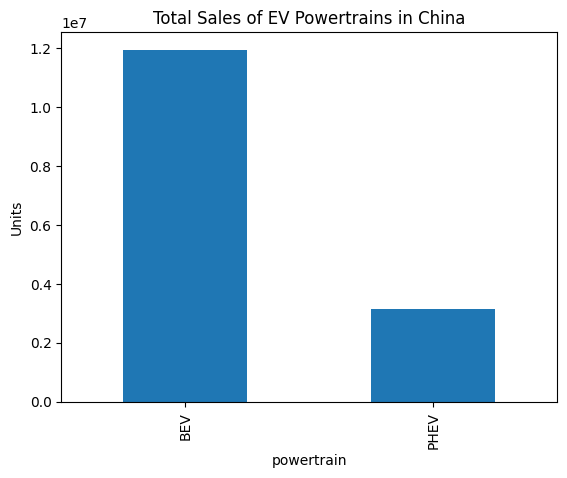

In [154]:
china_df[china_df.get('parameter') == 'EV sales'].groupby('powertrain').sum().drop(columns = ['parameter', 'region', 'year']).plot(kind = 'bar', title = 'Total Sales of EV Powertrains in China', legend = False, ylabel = 'Units');

The chart above plots the total EV sales of China from 2011 to 2022 for each powertrain. It can be clearly seen that BEVs is dominating the Chinese market in comparison to PHEVs, which is interesting as it shows the current high adoption of pure EVs globally. Electric vehicles running on pure lithium battery is growing more popular in comparison to hybrid vehicles, with sales of the former in China being almost triple of the latter.

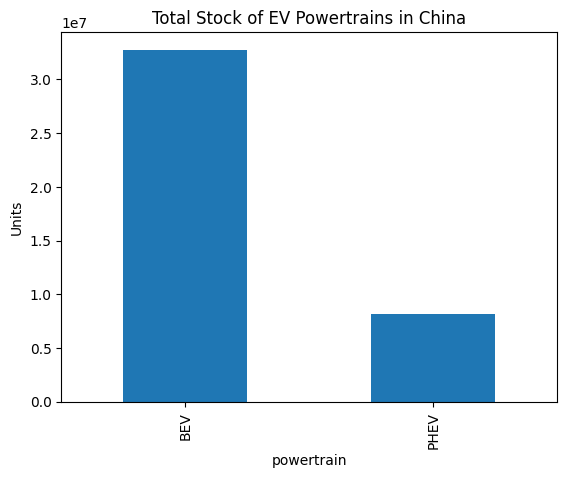

In [155]:
china_df[china_df.get('parameter') == 'EV stock'].groupby('powertrain').sum().drop(columns = ['parameter', 'region', 'year']).plot(kind = 'bar', title = 'Total Stock of EV Powertrains in China', legend = False, ylabel = 'Units');

The chart above plots the total EV stock of China from 2011 to 2022 for each powertrain. It can be clearly seen that the amount of BEV and PHEV stock in the Chinese market is highly similar to the EV sales of the same time frame. However, the scale is more than double of EV sales, which indicate that Chinese markets have only sold less than double of their total overall EV stock. This indicates another aspect of the Chinese EV market, production. China is a key producer of global EVs, and this is reflected again in the chart above. 

##### Outcome 3.1.2: China's EV Sales and EV Stock Historical Trend Based on Powertrains | [Back to Outcome 3](#outcome-3-ev-powertrains-sales-and-stocks-of-top-ev-countries--back-to-outcomes)

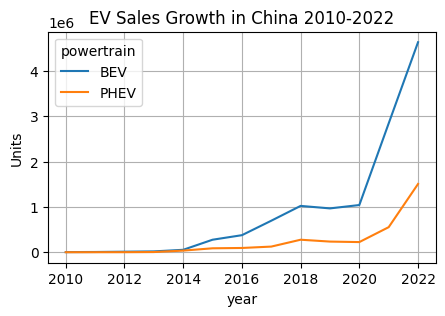

In [156]:
china_df_sales = china_df[china_df.get('parameter') == 'EV sales'].groupby(['year', 'powertrain']).sum().drop(columns=['region', 'parameter']).reset_index()
china_df_sales.pivot(index = 'year', columns = 'powertrain', values = 'value').plot(figsize=(5,3), title = 'EV Sales Growth in China 2010-2022', grid=True, ylabel = 'Units');

When we depict the EV sales trend of both BEV and PHEV in China from 2010 to 2022 in the time-series chart above, a clear difference between the growth of the two different powertrains in the recent 12-year span can be seen clearly. While both powertrains have grown in sales significantly over the 12 years, BEV's sales have grown more exponentially compared to PHEV's sales. While they were on a similar level from 2010 to 2014, BEV outsold PHEV up until 2022, reaching more than double in 2020, and even more than triple its counterpart in 2022. However, it is interesting to see that sales for both powertrains in China were stagnant from 2018 to 2020. 

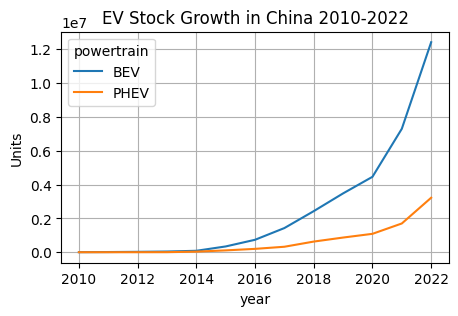

In [157]:
china_df_stock = china_df[china_df.get('parameter') == 'EV stock'].groupby(['year', 'powertrain']).sum().drop(columns=['region', 'parameter']).reset_index()
china_df_stock.pivot(index = 'year', columns = 'powertrain', values = 'value').plot(figsize=(5,3), title = 'EV Stock Growth in China 2010-2022', grid=True, ylabel = 'Units');

When we depict the EV stock trend of both BEV and PHEV in China from 2010 to 2022 in the time-series chart above, a clear difference between the growth of the two different powertrains can also be seen. Logically, it makes sense that BEV's stock have grown more exponentially compared to PHEV's stock, as their sales have done the same thing. While they were on a similar level from 2010 to 2014, BEV stock rose exponentially compared to PHEV up until 2022, with no stagnant years unlike EV sales, suggesting that stock kept increasing even though sales were stagnant to prepare for market demand.

##### Outcome 3.2: UK's Powertrains | [Back to Outcome 3](#outcome-3-ev-powertrains-sales-and-stocks-of-top-ev-countries--back-to-outcomes)

In [158]:
uk_df = outcome3_df[outcome3_df.get('region') == 'United Kingdom']
uk_df

,region,parameter,powertrain,year,value
8095,United Kingdom,EV stock,PHEV,2010,21.0
8096,United Kingdom,EV sales,BEV,2010,9.0
8097,United Kingdom,EV stock,BEV,2010,940.0
8104,United Kingdom,EV sales,BEV,2010,230.0
8105,United Kingdom,EV sales,BEV,2010,4.0
...,...,...,...,...,...
8371,United Kingdom,EV sales,BEV,2022,17000.0
8372,United Kingdom,EV sales,BEV,2022,270000.0
8373,United Kingdom,EV stock,BEV,2022,550000.0
8374,United Kingdom,EV sales,PHEV,2022,410.0


##### Outcome 3.2.1: UK's EV Sales and EV Stock Based on Powertrains | [Back to Outcome 3](#outcome-3-ev-powertrains-sales-and-stocks-of-top-ev-countries--back-to-outcomes)

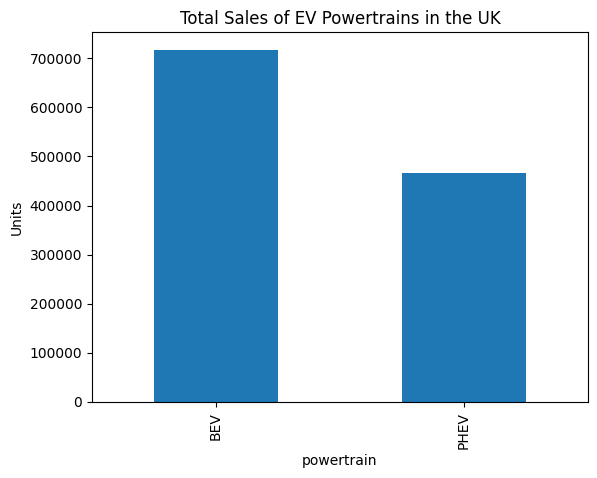

In [159]:
(uk_df[uk_df.get('parameter') == 'EV sales']
 .groupby('powertrain').sum()
 .drop(columns = ['parameter', 'region', 'year'])
 .plot(kind = 'bar', title = 'Total Sales of EV Powertrains in the UK', ylabel = 'Units', legend = False));

The chart above plots the total EV sales of the United Kingdom from 2011 to 2022 for each powertrain. It can be clearly seen that BEVs is dominating the English market in comparison to PHEVs, which is interesting as it shows the current high adoption of pure EVs globally. Electric vehicles running on pure lithium battery is growing more popular in comparison to hybrid vehicles, with sales of the former being almost 50% higher than the latter.

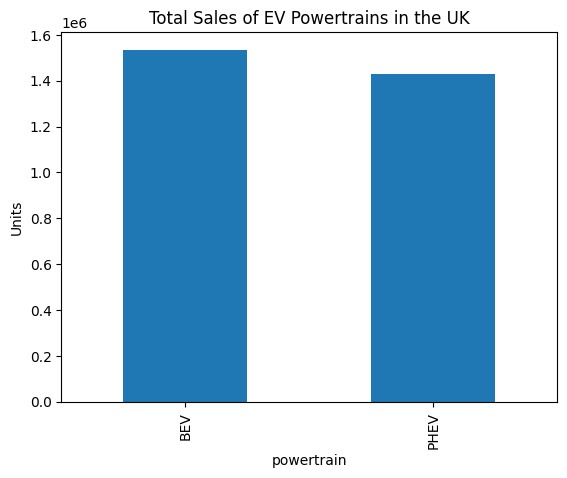

In [160]:
(uk_df[uk_df.get('parameter') == 'EV stock']
 .groupby('powertrain').sum()
 .drop(columns = ['parameter', 'region', 'year'])
 .plot(kind = 'bar', title = 'Total Sales of EV Powertrains in the UK', ylabel = 'Units', legend = False));

The chart above plots the total EV stock of the United Kingdom from 2011 to 2022 for each powertrain. It can be clearly seen that the amount of BEV and PHEV stock in the English market is not similar to the EV sales of the same time frame, mainly on the similarity between PHEV and BEV. However, it is similar to China that the scale is more than double of EV sales, which indicate that English markets have only sold less than double of their total overall EV stock.

##### Outcome 3.2.2: UK's EV Sales and EV Stock Historical Trend Based on Powertrains | [Back to Outcome 3](#outcome-3-ev-powertrains-sales-and-stocks-of-top-ev-countries--back-to-outcomes)

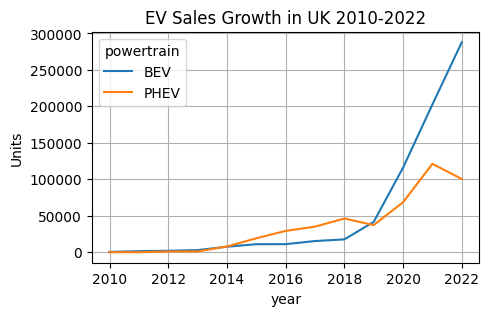

In [161]:
uk_df_sales = (uk_df[uk_df.get('parameter') == 'EV sales'].groupby(['year', 'powertrain'])
               .sum().drop(columns=['region', 'parameter']).reset_index())
(uk_df_sales.pivot(index = 'year', columns = 'powertrain', values = 'value')
 .plot(figsize=(5,3), title = 'EV Sales Growth in UK 2010-2022', grid=True, ylabel = 'Units'));

When we depict the EV sales trend of both BEV and PHEV in the UK from 2010 to 2022 in the time-series chart above, a clear difference between the growth in the Chinese and the UK market can be seen. While BEV's sales have grown more exponentially compared to PHEV's sales over the last 12 years, it is interesting that there was a time period from 2014 to 2019 where PHEVs sold more than BEVs, which was something that didn't happen in the Chinese market. 

However, BEV grew exponentially and outsold PHEV up until 2022 by a heavy margin. In 2021, PHEVs hit a peak of sales, before plummeting down until today, while the sales of BEVs continue to rise on an exponential rate. 

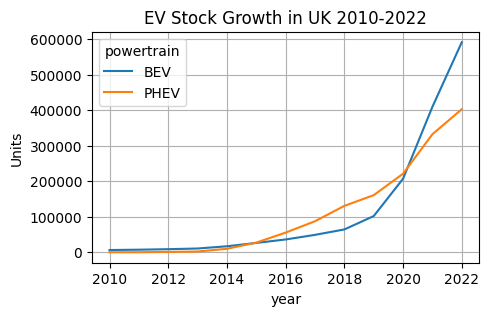

In [162]:
uk_df_stock = uk_df[uk_df.get('parameter') == 'EV stock'].groupby(['year', 'powertrain']).sum().drop(columns=['region', 'parameter']).reset_index()
uk_df_stock.pivot(index = 'year', columns = 'powertrain', values = 'value').plot(figsize=(5,3), title = 'EV Stock Growth in UK 2010-2022', grid=True, ylabel = 'Units');

When we depict the EV stock trend of both BEV and PHEV in the United Kingdom from 2010 to 2022 in the time-series chart above, it makes sense that BEV's stock have grown more exponentially compared to PHEV's stock, as their sales have done the same thing. When PHEVs were selling more than the BEVs from 2014 to 2019, it is interesting that PHEV had bigger inventories up until 2020, a full year before BEV's supply finally caught up with PHEV's supply in response to increasing demand. 

Since then, BEVs have had more stock, but it is important to note that while sales for PHEVs plummeted from 2021, stock still kept increasing, indicating that English producers are optimistic about the market and demand for PHEVs.

 #### **Outcome 4**: Electricity Demand by Mode and the Relationship Between EV Charging Points and EVs Sold | [Back to Outcomes](#aim--outcomes)

For this outcome, the relation between EV charging points and electricity demand will be explored. As a result, only data of those two parameters are needed, hence the dataframe below. Irrelevant colums are also dropped. 

In [163]:
outcome4_df = (df[(df.get('category') == 'Historical') & 
                  ((df.get('parameter') == 'EV charging points') | (df.get('parameter') == 'Electricity demand'))])
outcome4_df.drop(columns = ['powertrain', 'continent','category'])

,region,parameter,mode,year,unit,value
40,Australia,EV charging points,EV,2017,charging points,40.0
41,Australia,EV charging points,EV,2017,charging points,440.0
42,Australia,EV charging points,EV,2018,charging points,61.0
43,Australia,EV charging points,EV,2018,charging points,670.0
56,Australia,EV charging points,EV,2019,charging points,250.0
...,...,...,...,...,...,...
9243,World,Electricity demand,Cars,2021,GWh,34000.0
9320,World,Electricity demand,Buses,2022,GWh,23000.0
9321,World,Electricity demand,Trucks,2022,GWh,3900.0
9322,World,Electricity demand,Vans,2022,GWh,5700.0


Firstly, it is important to see how complete our dataset is in encompassing global electricity demand for EVs. As a result, the chart mapping total electricity demand globally below is created.

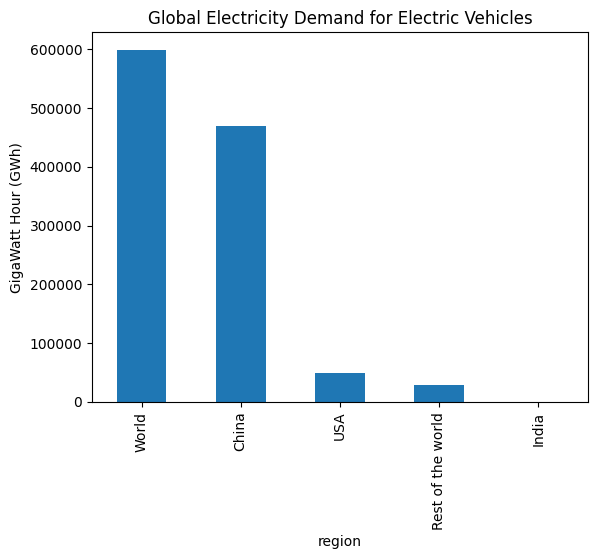

In [164]:
edemand = (outcome4_df[(outcome4_df.get('parameter') == 'Electricity demand')]
           .groupby(by='region').sum()
           .sort_values(by='value', ascending = False))
edemand.plot(kind='bar', y ='value', legend=False, title = 'Global Electricity Demand for Electric Vehicles', ylabel = 'GigaWatt Hour (GWh)');

##### Outcome 4.1: Total Elecricity Demand by Mode (2011-2024) | [Back to Outcome 4](#outcome-4-electricity-demand-by-mode-and-the-relationship-between-ev-charging-points-and-evs-sold--back-to-outcomes)

Unfortunately, the chart above shows that the data only encompasses USA, China, India, and Rest of the world. Hence, the dataset is incomplete as most of global countries are not recorded in the dataset, so pulling any conclusions from analyzing electricity demand based on unique countries will not be useful.

However, creating a new dataframe that compares electricity demand based on mode gives us a more meaningful analysis, mainly the vehicle modes using the most electricity demand in their EV models. 

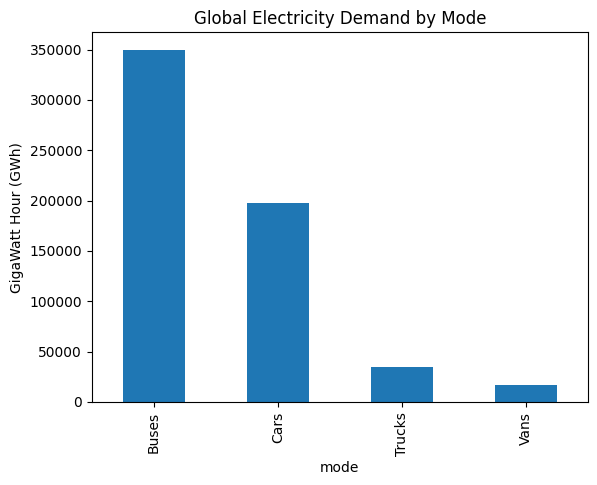

In [165]:
edemand_by_mode = (outcome4_df[(outcome4_df.get('parameter') == 'Electricity demand') & (outcome4_df.get('region') == 'World')]
                   .groupby(by='mode').sum().sort_values(by='value', ascending = False))
edemand_by_mode.plot(kind='bar', y ='value',title='Global Electricity Demand by Mode', ylabel = 'GigaWatt Hour (GWh)', legend = False);

The chart above shows the overall electricity demand for different vehicle modes globally. Buses use the most electricity, which is indeed surprising as the most common type of EV vehicles are cars, with it coming second. Trucks and Vans each use a significantly smaller amount than Buses and Cars, even if combined.

Looking at only the total electricity demand from 2010 to 2022 can be misleading, so it will be useful to see how these data became grew from the first time global electricity demand was recorded for each mode.

##### Outcome 4.2: Growth of Total Electricity Demand by Mode from 2010 to 2022 | [Back to Outcome 4](#outcome-4-electricity-demand-by-mode-and-the-relationship-between-ev-charging-points-and-evs-sold--back-to-outcomes)

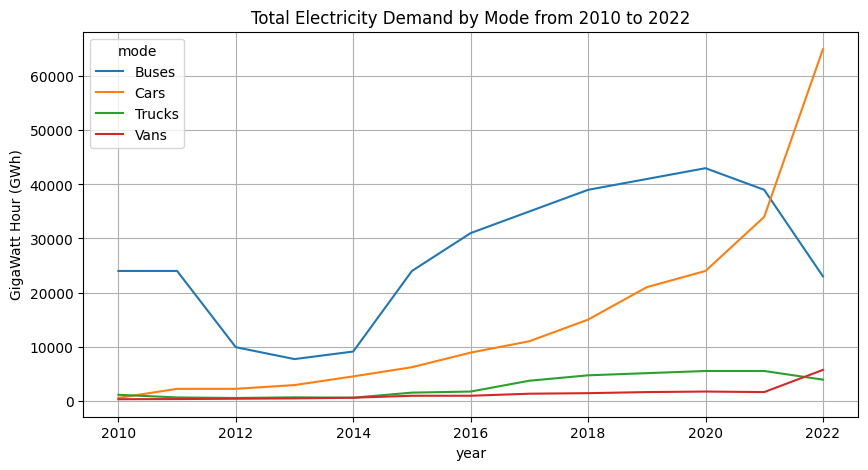

In [166]:
world_mode = outcome4_df[(outcome4_df.get('parameter') == 'Electricity demand') & (outcome4_df.get('region') == 'World')]
world_mode = world_mode.pivot(index='year', columns='mode', values='value')
world_mode.plot(figsize=(10, 5), title = 'Total Electricity Demand by Mode from 2010 to 2022', grid = True, ylabel='GigaWatt Hour (GWh)');

From 2011 to 2022, Trucks and Vans both stayed constant in their electricity demand. The interesting part is Buses first decreases from 2011 to 2014, then increased until reaching its peak in 2020, and decreases until the present. The growth of electricity demand for cars is the most insightful conclusion from this chart, showing the real-world phenomenon of EV cars becoming more and more common in our society, even on an upwards trajectory until today. 

##### Outcome 4.3: Relationship Between EV Charging Points and EVs Sold | [Back to Outcome 4](#outcome-4-electricity-demand-by-mode-and-the-relationship-between-ev-charging-points-and-evs-sold--back-to-outcomes)

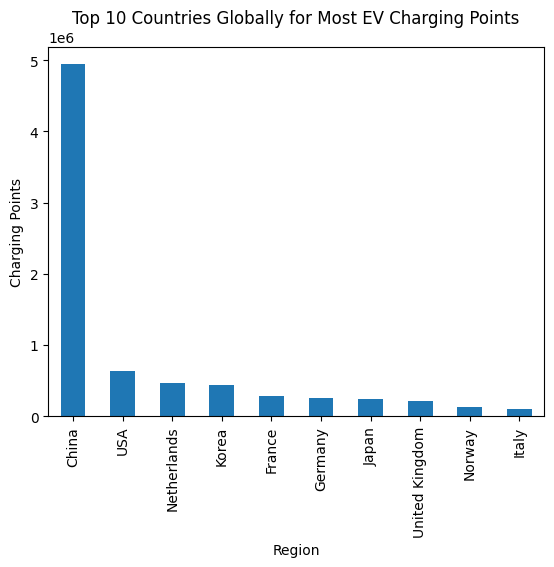

In [167]:
chargingpoints = (outcome4_df[(outcome4_df.get('parameter') == 'EV charging points')]
                  .groupby(by='region').sum()
                  .sort_values(by='value', ascending=False).head(10))
chargingpoints.plot(kind='bar', y='value', title = 'Top 10 Countries Globally for Most EV Charging Points', 
                    legend = False, ylabel = 'Charging Points', xlabel = 'Region');

If we compare the Top 10 Countries Globally for Most EV Charging Points and [Top 10 Countries Globally for EVs Sold](#outcome-126-top-10-countries-for-most-evs-sold-globally), it is interesting to see that both charts host the same 9 out of 10 countries, albeit in a different order. This shows that there is a positive direct relationship between EVs sold and EV charging points, which logically makes sense as if a country uses more EVs, they use more charging points. However, some external factors such as build and specifications are also present, hence their relationship is not 1 to 1. 

 #### **Outcome 5**: Year-to-Year Visualization of National EV Stock and Sales **Shares** of the Top 5 Countries for EVs Sold  (by Mode) | [Back to Outcomes](#aim--outcomes)

Using the data we found in Outcome 4 for the Top 5 countries in EV sales, we will be comparing the proportion of each **mode** (Cars, Buses, Trucks, and Vans) in each country between 2010 to 2022

In [168]:
top5_countries = country_sales_sorted[0:5].index
print(np.array(top5_countries))

['China' 'USA' 'Germany' 'United Kingdom' 'France']


The proportion of each mode is described by the parameters **EV sales share** and **EV stock share**. The definitions are as follows:
- EV sales share: The proportion of EVs by mode sold in that country in a certain year relative to non-EVs
- EV stock share: The proportion of EVS by mode avaialable in that country in a certain year relative to non-EVs


To display EV sales share and stock share of each country, the 'Publicly available fast', 'Publicly available slow' must be removed from the dataframe's column of powertrain. Additionally, we query the regions to the appropriate countries and the paremter to **EV sales share** and **EV stock share** only.

In [169]:
outcome5_df = df[df['category'] == 'Historical']
outcome5_df = outcome5_df[~outcome5_df['powertrain'].isin(['Publicly available fast','Publicly available slow'])]
outcome5_df = (outcome5_df[(outcome5_df['region'].isin(top5_countries)) & 
                           (outcome5_df['parameter'].isin(['EV sales share', 
                                                           'EV stock share']))]
               )
outcome5_df

,region,category,parameter,mode,powertrain,year,unit,value,continent
994,China,Historical,EV sales share,Buses,EV,2010,percent,0.2700,Asia
995,China,Historical,EV stock share,Buses,EV,2010,percent,0.0480,Asia
996,China,Historical,EV sales share,Vans,EV,2010,percent,0.0110,Asia
997,China,Historical,EV stock share,Vans,EV,2010,percent,0.0047,Asia
998,China,Historical,EV sales share,Cars,EV,2010,percent,0.0100,Asia
...,...,...,...,...,...,...,...,...,...
8501,USA,Historical,EV sales share,Cars,EV,2020,percent,2.2000,North America
8518,USA,Historical,EV sales share,Cars,EV,2021,percent,4.5000,North America
8519,USA,Historical,EV stock share,Cars,EV,2021,percent,0.9500,North America
8562,USA,Historical,EV stock share,Cars,EV,2022,percent,1.3000,North America


Since we will be creating multiple plots per country, we wrote a **plotter** function that takes in outcome5_df and each country from top5_countries. This plotter is quite extensive, so a couple things to note is that it **plots all EV sales and stock shares** between 2010 to 2022 even **though some countries contain null values**, in which the plotter displays **NO DATA**.

In [170]:
def oc5_plotter(df, country):
    #Creates size of subplots
    plt.figure(figsize=(12,8))
    
    #Creates a super title
    if country in ['USA', 'United Kingdom']: 
        plt.suptitle(f'National EV Stock and Sales Shares Comparison in the {country} (2010-2022)')
    else:
         plt.suptitle(f'National EV Stock and Sales Shares Comparison in {country} (2010-2022)')   
    modes = df['mode'].unique()
    i = 0
    years = np.arange(2010,2023)
    for mode in modes:
        i += 1
        #Query the dataframe for the mode and region of interest into ndf
        ndf = df[(df['mode'] == mode) & (df['region'] == country)]
        #Query ndf for sales share and stock share
        sales_share = ndf[ndf['parameter'] == 'EV sales share']
        stock_share = ndf[ndf['parameter'] == 'EV stock share']
        
        #Sets 1st cond. statement for creating a subplot with no data
        if ndf.shape[0] == 0:
            plt.subplot(220 + i)
            plt.title(mode)
            plt.plot(years, np.zeros(len(years)))
            plt.text(2015.5,0.02,'NO DATA')
        
        #Sets 2nd cond. statement for creating a subplot with matching length
        #of sales and stock share    
        elif len(sales_share) == len(stock_share):
            #iterates every subplot
            plt.subplot(220 + i)
            #creates new empty arrays for sales share and stock share to 
            #account for possible null values
            mod_sales_share = []
            mod_stock_share = []
            for year in years:
                #appends value into array if sales share of that year and
                #its value is not null. 
                if year in np.array(sales_share['year']):
                    mod_sales_share.append(float(sales_share[sales_share['year'] == year]['value']))
                else: 
                    mod_sales_share.append(0) #sets zero if data is null

            for year in years:
                #appends value into array if stock share of that year and
                #its value is not null. 
                if year in np.array(stock_share['year']):
                    mod_stock_share.append(float(stock_share[stock_share['year'] == year]['value']))
                else: 
                    mod_stock_share.append(0)  #sets zero if data is null
            
            #sets filled out arrays in an numpy array
            mod_sales_share = np.array(mod_sales_share)
            mod_stock_share = np.array(mod_stock_share)
            
            #finds zero values in the arrays for no data labeling        
            sales_zero_idx = np.where(mod_sales_share == 0)[0]
            stock_zero_idx = np.where(mod_stock_share == 0)[0]
            
            #plots arrays vs years        
            plt.plot(years, mod_stock_share, marker='s', color='b', label='Stock Share')
            plt.plot(years, mod_sales_share, marker='o', color='r', label='Sales Share')
            
            ##Plots no data values
            #sets no data label added to false
            no_data_label_added = False
            
            #if sales_share array has zero values, then it will plot the NO DATA value    
            if sales_zero_idx.size > 0:
                plt.scatter(years[sales_zero_idx], mod_sales_share[sales_zero_idx], marker='x',
                            s=100, color='black', label='NO DATA' if not no_data_label_added else None,zorder=3)
                no_data_label_added = True
            #if sales_share array has zero values, then it will plot the NO DATA value    
            if stock_zero_idx.size > 0:
                plt.scatter(years[stock_zero_idx], mod_sales_share[stock_zero_idx], marker='x',
                            s=100, color='black', label='NO DATA' if not no_data_label_added else None,zorder=3)           
            
            plt.xlabel('Year')
            plt.ylabel('Percentage [%]')
            plt.legend()
            plt.title(mode)
            plt.grid(True)
            
        #Sets last cond. statement for creating a subplot with non-matching 
        #length of sales and stock share
        elif sales_share.shape[0] != stock_share.shape[0]:
            plt.subplot(220 + i)
            mod_sales_share = []
            mod_stock_share = []

            for year in years:
                if year in np.array(sales_share['year']):
                    mod_sales_share.append(float(sales_share[sales_share['year'] == year]['value']))
                else: 
                    mod_sales_share.append(0)

            for year in years:
                if year in np.array(stock_share['year']):
                    mod_stock_share.append(float(stock_share[stock_share['year'] == year]['value']))
                else: 
                    mod_stock_share.append(0)
                    
            mod_sales_share = np.array(mod_sales_share)
            mod_stock_share = np.array(mod_stock_share)
            sales_zero_idx = np.where(mod_sales_share == 0)[0]
            stock_zero_idx = np.where(mod_stock_share == 0)[0]
            plt.plot(years, mod_stock_share, marker='s', color='b', label='Stock Share')
            plt.plot(years, mod_sales_share, marker='o', color='r', label='Sales Share')
                        
            no_data_label_added = False
            
            if sales_zero_idx.size > 0:
                plt.scatter(years[sales_zero_idx], mod_sales_share[sales_zero_idx], marker='x', color='black', 
                            s=100, label='NO DATA' if not no_data_label_added else '',zorder=3)
                no_data_label_added = True
            if stock_zero_idx.size > 0:
                plt.scatter(years[stock_zero_idx], mod_stock_share[stock_zero_idx], marker='x', color='black', 
                            s=100, label='NO DATA' if not no_data_label_added else '',zorder=3)
            

            plt.xlabel('Year')
            plt.ylabel('Percentage [%]')
            plt.legend()
            plt.title(mode)
            plt.grid(True)
            
    plt.tight_layout()
    plt.show()

##### Outcome 5.1: China's EV stock and sales share analysis | [Back to Outcome 5](#outcome-5-year-to-year-visualization-of-national-ev-stock-and-sales-shares-of-the-top-5-countries-for-evs-sold-by-mode--back-to-outcomes)

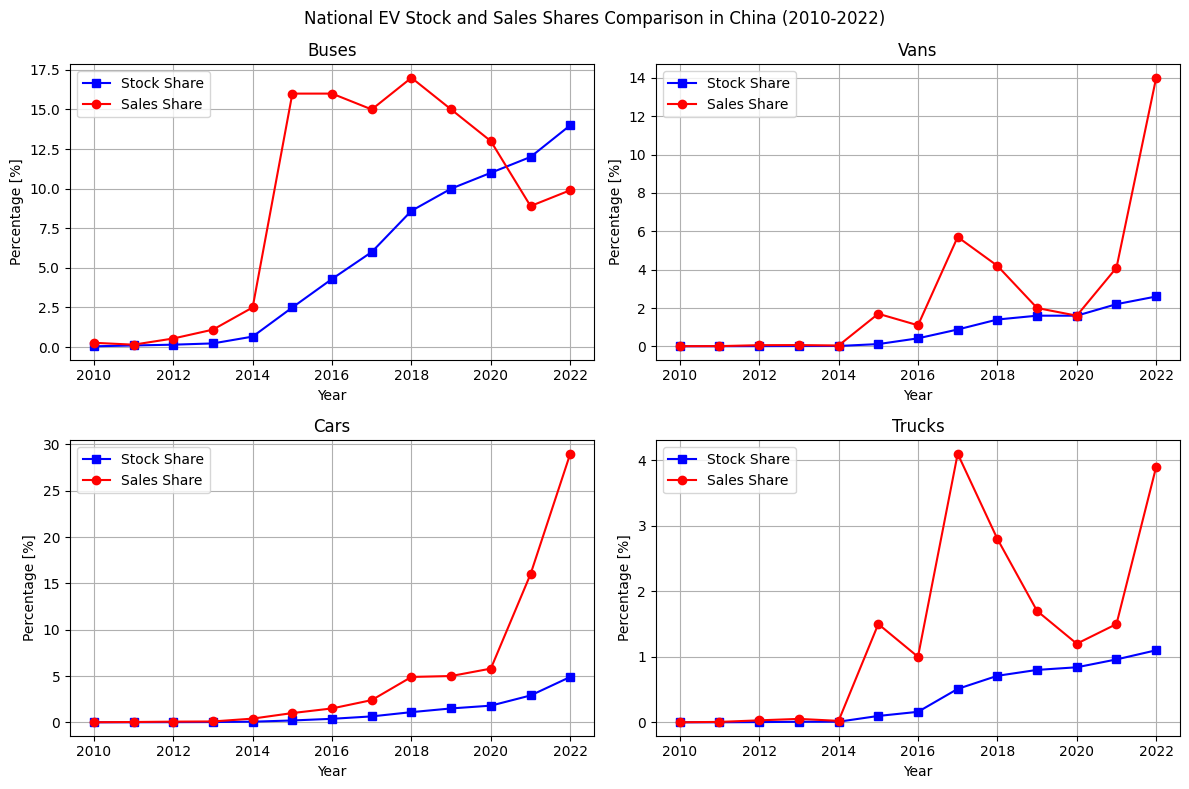

In [171]:
oc5_plotter(outcome5_df, 'China')

In China, the share of electric vehicle (EV) sales has seen exponential growth, accounting for nearly one-third of total car sales in 2022. The stock share of EVs has also shown steady growth since the mid-2010s. While other powertrain types have experienced consistent growth in stock share, their sales shares have fluctuated. Although the sales share of EV buses has declined, the stock share has increased, indicating that the Chinese government may be pursuing other strategies to reduce the number of non-EV buses, potentially replacing them with the country's relatively new high-speed rail programs.

##### Outcome 5.2: The United States's EV stock and sales share analysis | [Back to Outcome 5](#outcome-5-year-to-year-visualization-of-national-ev-stock-and-sales-shares-of-the-top-5-countries-for-evs-sold-by-mode--back-to-outcomes)

In [185]:
outcome5_df[outcome5_df['region']=='USA']['mode'].unique()

array(['Cars'], dtype=object)

Unfortunately, this dataset lacks sufficient data from the U.S., with **cars being the only available mode** for EV stock and sales share parameters.

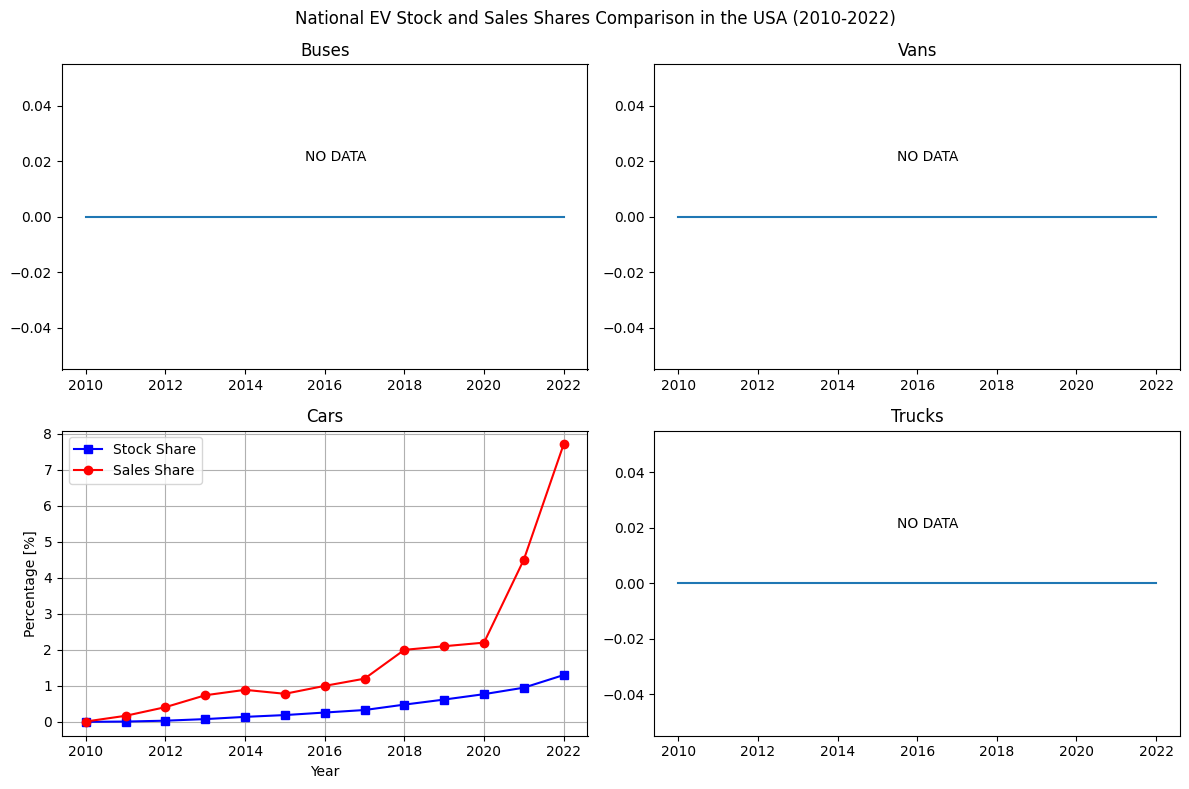

In [172]:
oc5_plotter(outcome5_df, 'USA')

The subplot of cars shows a notable increase in EV sales in the U.S. after 2020, driven by significant clean energy investments. Since 2020, over $85 billion has been funneled into EV manufacturing, batteries, and charging infrastructure, accelerating the domestic production of EVs and the expansion of essential EV-related services. These investments have **tripled EV sales** and provided market certainty for automakers (as seen in the subplot), further supporting the transition to a zero-emission future in the U.S.

##### Outcome 5.3: Germany's EV stock and sales share analysis | [Back to Outcome 5](#outcome-5-year-to-year-visualization-of-national-ev-stock-and-sales-shares-of-the-top-5-countries-for-evs-sold-by-mode--back-to-outcomes)

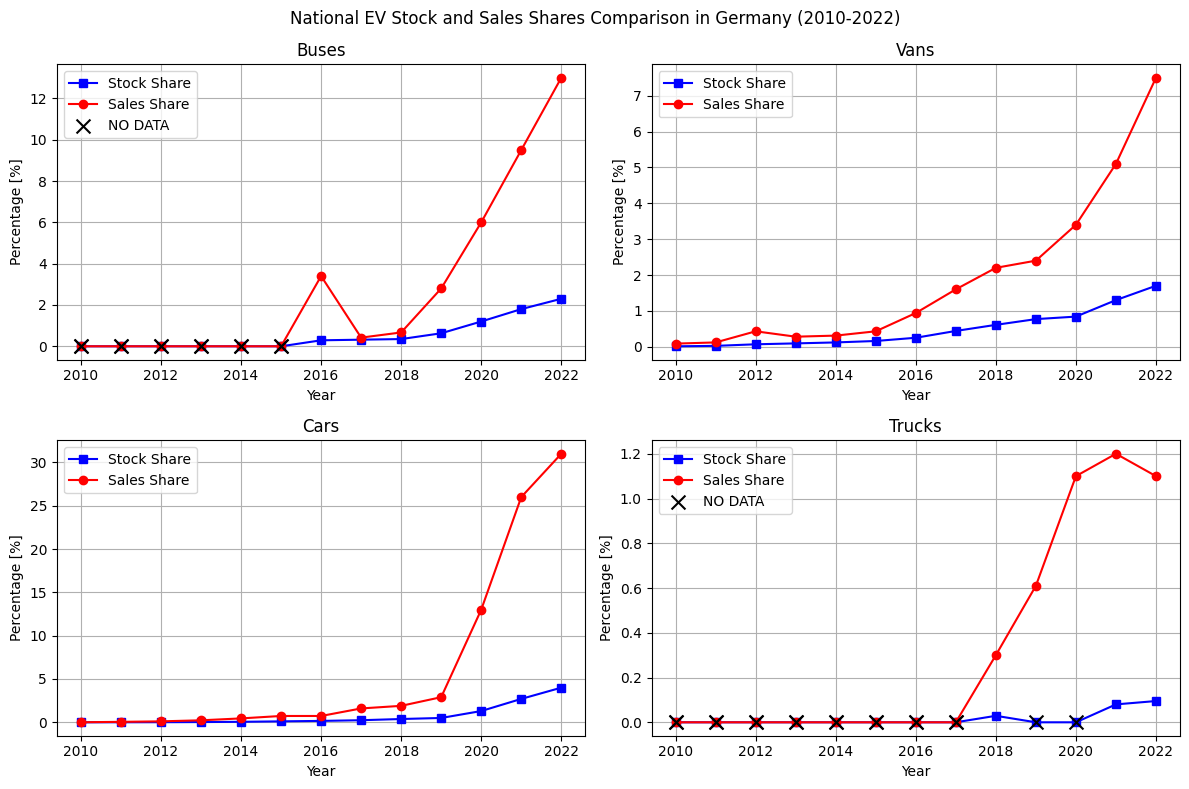

In [173]:
oc5_plotter(outcome5_df, 'Germany')

Germany stands out with the highest percentage of EV car sales among the countries listed, accounting for over **30% of its car sales in 2022**. This demonstrates the country's strong consumer demand for electric vehicles. However, it's notable that Germany's EV stock share is just below 4%, placing it second only to China in terms of the overall EV stock. This contrast highlights Germany's growing sales momentum, even though the total stock has yet to catch up fully to the leading country globally.

##### Outcome 5.4: The United Kingdom's EV stock and sales share analysis | [Back to Outcome 5](#outcome-5-year-to-year-visualization-of-national-ev-stock-and-sales-shares-of-the-top-5-countries-for-evs-sold-by-mode--back-to-outcomes)

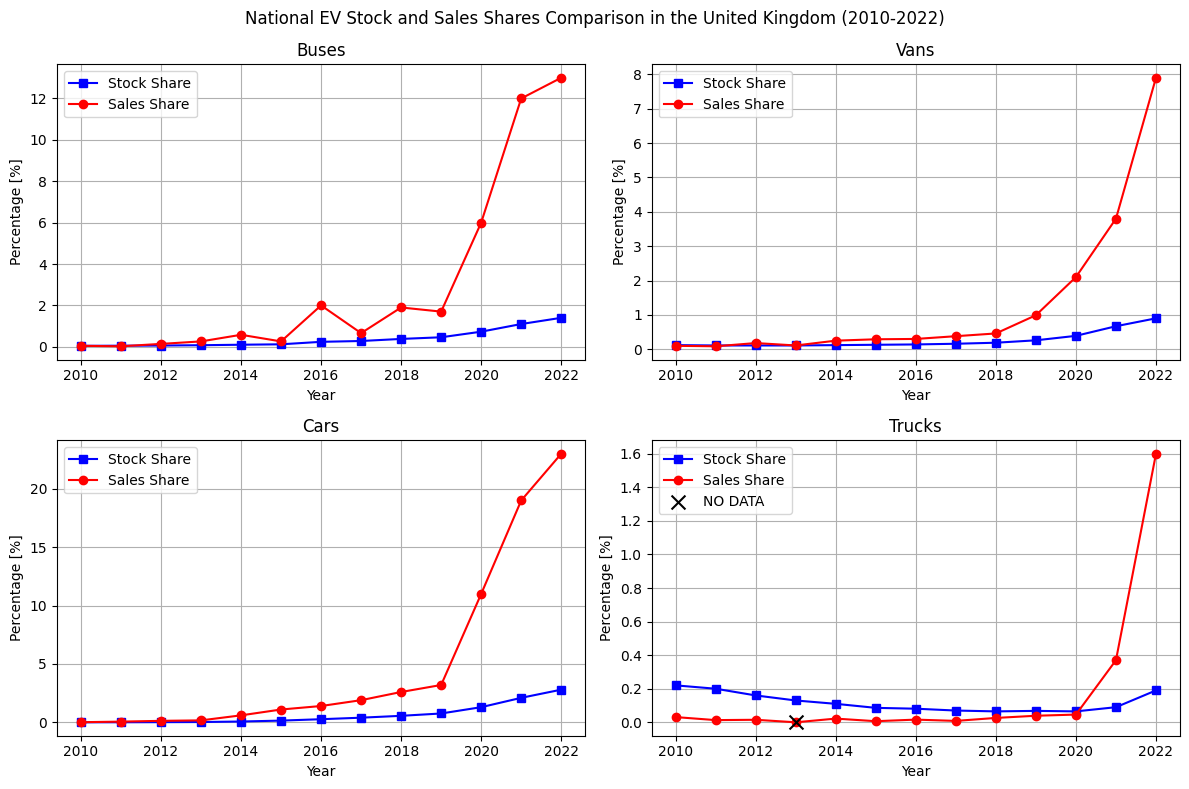

In [174]:
oc5_plotter(outcome5_df, 'United Kingdom')

In the U.K., it is worth noting the exponential growth of EV Vans Sales Share after 2016 (this is similar that of Germany's, but the U.K. holds a higher percentage point as of 2022). Additionally, a steady and even exponential demand for EV vans suggests a **unique market for EV van manufacturers**. Lastly, the U.K. endured a huge spike in truck sales share, placing it only second to China's. 

##### Outcome 5.5: France's EV stock and sales share analysis | [Back to Outcome 5](#outcome-5-year-to-year-visualization-of-national-ev-stock-and-sales-shares-of-the-top-5-countries-for-evs-sold-by-mode--back-to-outcomes)

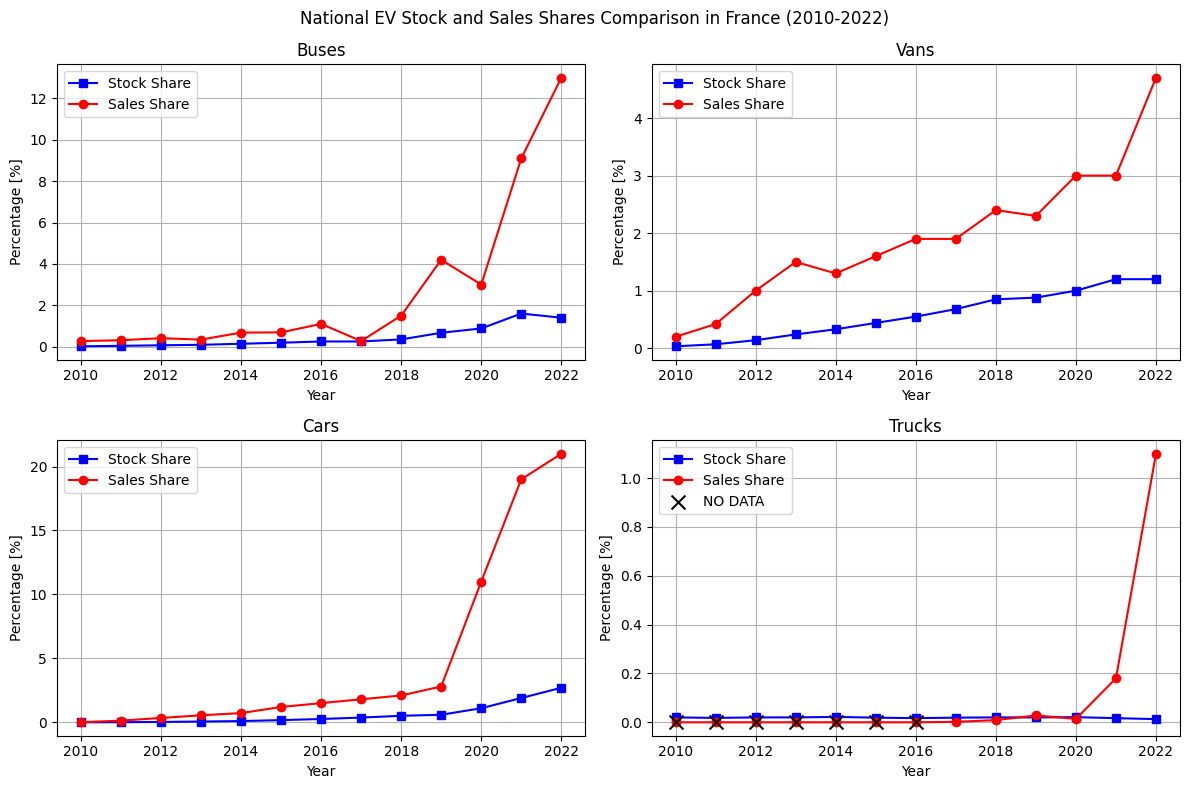

In [175]:
oc5_plotter(outcome5_df, 'France')

Similar to the U.K. and Germany in Europe, France demonstrated a clear interest in EV van sales with it having the earliest indication of interest during the start of this data collection. It is also worth mentioning that only in France has the **EV stock gone down** in recent years, in particular the EV stock of buses and trucks. This indicates that the country has in-fact, increased the share of other types of engines for other powertrains, such as the conventional internal combustion engine and/or hybrid alternatives.

## **Part 4:** Final Results + Conclusion ##
[Back to Table of Contents](#table-of-contents)

The five outcomes that we explored above were what we thought were possible meaningful conclusion, considering the balance, completeness, and scope of the dataset we used. The scope of the dataset was global. Hence, conclusions associated with global electric vehicles became the main and most interesting parts of our project. 

In [Outcome 1](#outcome-1-ranking-continents-and-countries-based-on-ev-sales), [comparing electric vehicle sales across continents](#outcome-11-ranking-continents-with-the-most-total-global-ev-sales) saw Asia, Europe, and North America (in order) as the biggest global sellers of EVs. When we [compare global electric vehicle sales further across individual countries](#outcome-126-top-10-countries-for-most-evs-sold-globally), China, USA, and Germany are also in the top three, being the key global players for electric vehicles. 

In [Outcome 2](#outcome-2-year-by-year-visualization-of-ev-sales-and-stock-per-continent-and-top-10-globally-with-an-in-depth-analysis-on-the-european-ev-market), visualizing the number of EV's sold and stocked in each continent provided valuable insights in understanding a certain country's EV influence on its general region. [In recent years (2020-2022) a, we saw China overtake the U.S.](#outcome-22-ev-sales-and-stock-visualization-of-the-top-top-10-countries-for-most-evs-sold-globally-from-outcome-126)  and saw [Germany's slow start quickly outpaces Norway's early lead, also in both parameters](#outcome-212-visualization-of-ev-sales-and-stock-in-europe). After a closer look in the European market, the [Dutch saw a steady growth of EV stock but is far outpaced by Italy in EV sales](#outcome-23-a-deeper-analysis-on-the-european-ev-market). Regardless, the European market generally had a substantial amount growth in the last 4-6 years.

In [Outcome 3](#outcome-3-ev-powertrains-sales-and-stocks-of-top-ev-countries), exploring the growth of the EV sales from 2010 to 2022 found in Outcome 1 deeper led us to explore the growth in sales and stock of specific EV powertrains such as BEV and PHEV in [China](#outcome-312-chinas-ev-sales-and-ev-stock-historical-trend-based-on-powertrains) and the [UK](#outcome-322-uks-ev-sales-and-ev-stock-historical-trend-based-on-powertrains), the two countries with the nost data in this dataset. It was interesting to see that both had BEV overtake PHEV, but at some point in the UK, PHEV had more sales and stock, which didn't happen in China. 

In [Outcome 4](#outcome-4-electricity-demand-by-mode-and-the-relationship-between-ev-charging-points-and-evs-sold), electric vehicles were explored by mode (Cars, Buses, Trucks, etc), instead of by powertrain. It was interesting to look at the [growth of demand for the different modes](#outcome-42-growth-of-total-electricity-demand-by-mode-from-2011-to-2024), showcasing how EV cars became more and more common as we reached 2022, something still present up until today. 

In [Outcome 5](#outcome-5-year-to-year-visualization-of-national-ev-stock-and-sales-shares-of-the-top-5-countries-for-evs-sold--by-mode), exploring the proportions of EVs sold and stocked by mode puts more emphasis in the type of mode that is leading the transition into electrical vehicles, with cars being the dominant changemaker and buses being second. Analyzing the shares of EVs in the Top 5 countries by EV sales allowed us to understand that all major countries in this net-zero-based transportation transition generally has had an exponential growth of shares in all modes over the last 4 years, [except China's decreasing bus sales share](#outcome-51-chinas-ev-stock-and-sales-share-analysis). Besides China and the U.S., all other countries experienced a decrease in car sales share in 2022, indicating that sales might peak in the near future. 